In [866]:
# Melakukan import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox
from imblearn import under_sampling, over_sampling
import gdown
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, fbeta_score, make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, reset_parameter, LGBMClassifier

import shap

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [867]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [868]:
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [869]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


In [870]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [871]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [872]:
df.duplicated().sum()

0

In [873]:
df_clean = df.copy()
   
    # Replace missing values with the median of each column in: 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek' and 2 other columns
df_clean = df_clean.fillna({'SkorKepuasanPegawai': df['SkorKepuasanPegawai'].median(), 'JumlahKeikutsertaanProjek': df['JumlahKeikutsertaanProjek'].median(), 'JumlahKeterlambatanSebulanTerakhir': df['JumlahKeterlambatanSebulanTerakhir'].median(), 'JumlahKetidakhadiran': df['JumlahKetidakhadiran'].median()})
    
    # Replace missing values with the most common value of each column in: 'AlasanResign'
df_clean = df_clean.fillna({'AlasanResign': df['AlasanResign'].mode()[0]})
    
    # Replace all instances of "yes" with "1" in column: 'PernahBekerja'
df_clean['PernahBekerja'] = df_clean['PernahBekerja'].str.replace("yes", "1", case=False, regex=False)
    
    # Change column type to int64 for column: 'PernahBekerja'
df_clean = df_clean.astype({'PernahBekerja': 'int64'})
    
    # Drop column: 'PernahBekerja'
df_clean = df_clean.drop(columns=['PernahBekerja'])
    
    # Replace gaps forward from the previous valid value in: 'IkutProgramLOP'
df_clean = df_clean.fillna({'IkutProgramLOP': df['IkutProgramLOP'].ffill()})


df_clean.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [874]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df_clean.select_dtypes(include=num)
num = num.columns
cat = ['StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','HiringPlatform','TingkatPendidikan','AlasanResign']

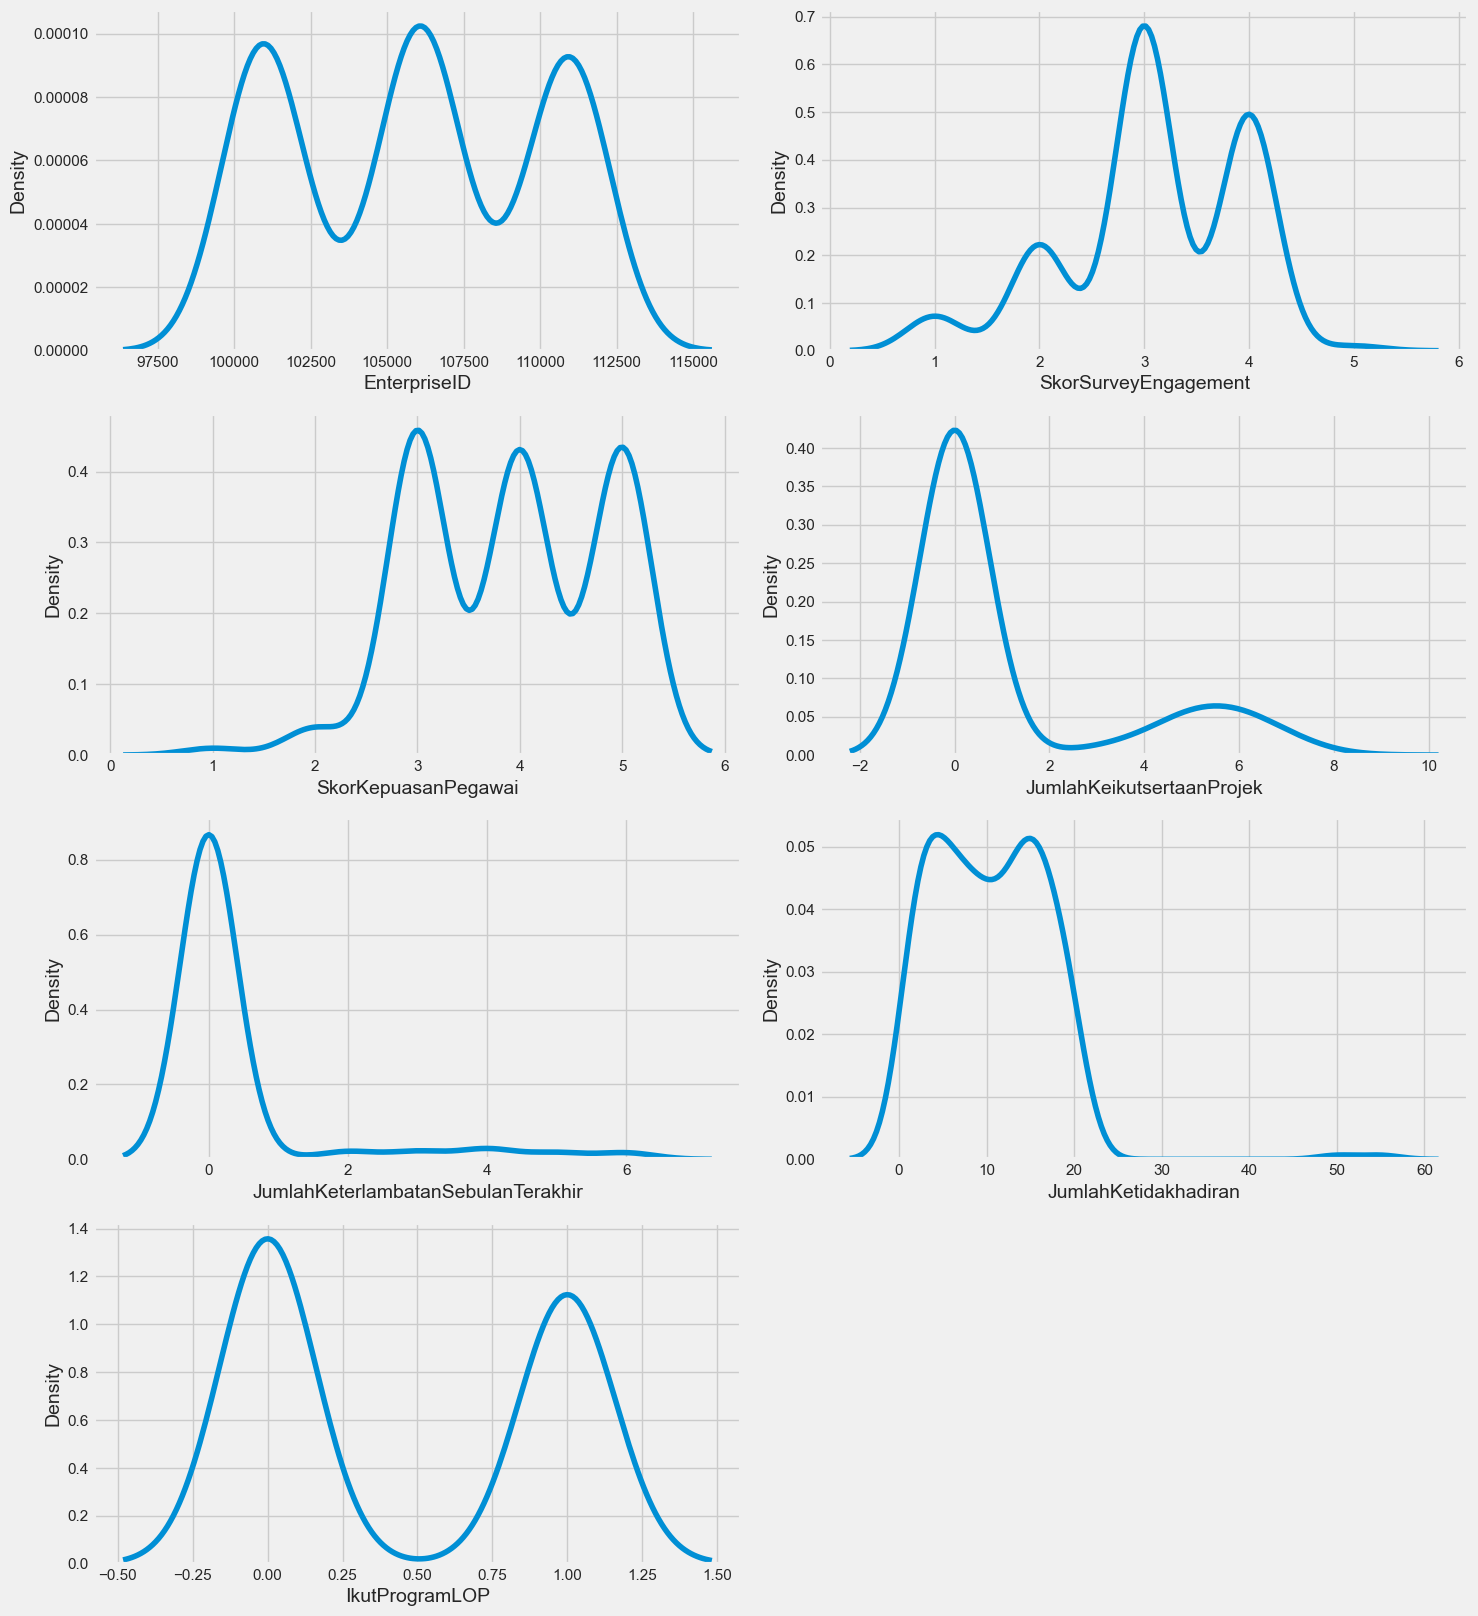

In [875]:
plt.figure(figsize= (15, 20))
for i in range(len(num)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x = df_clean[num[i]])
    plt.tight_layout()

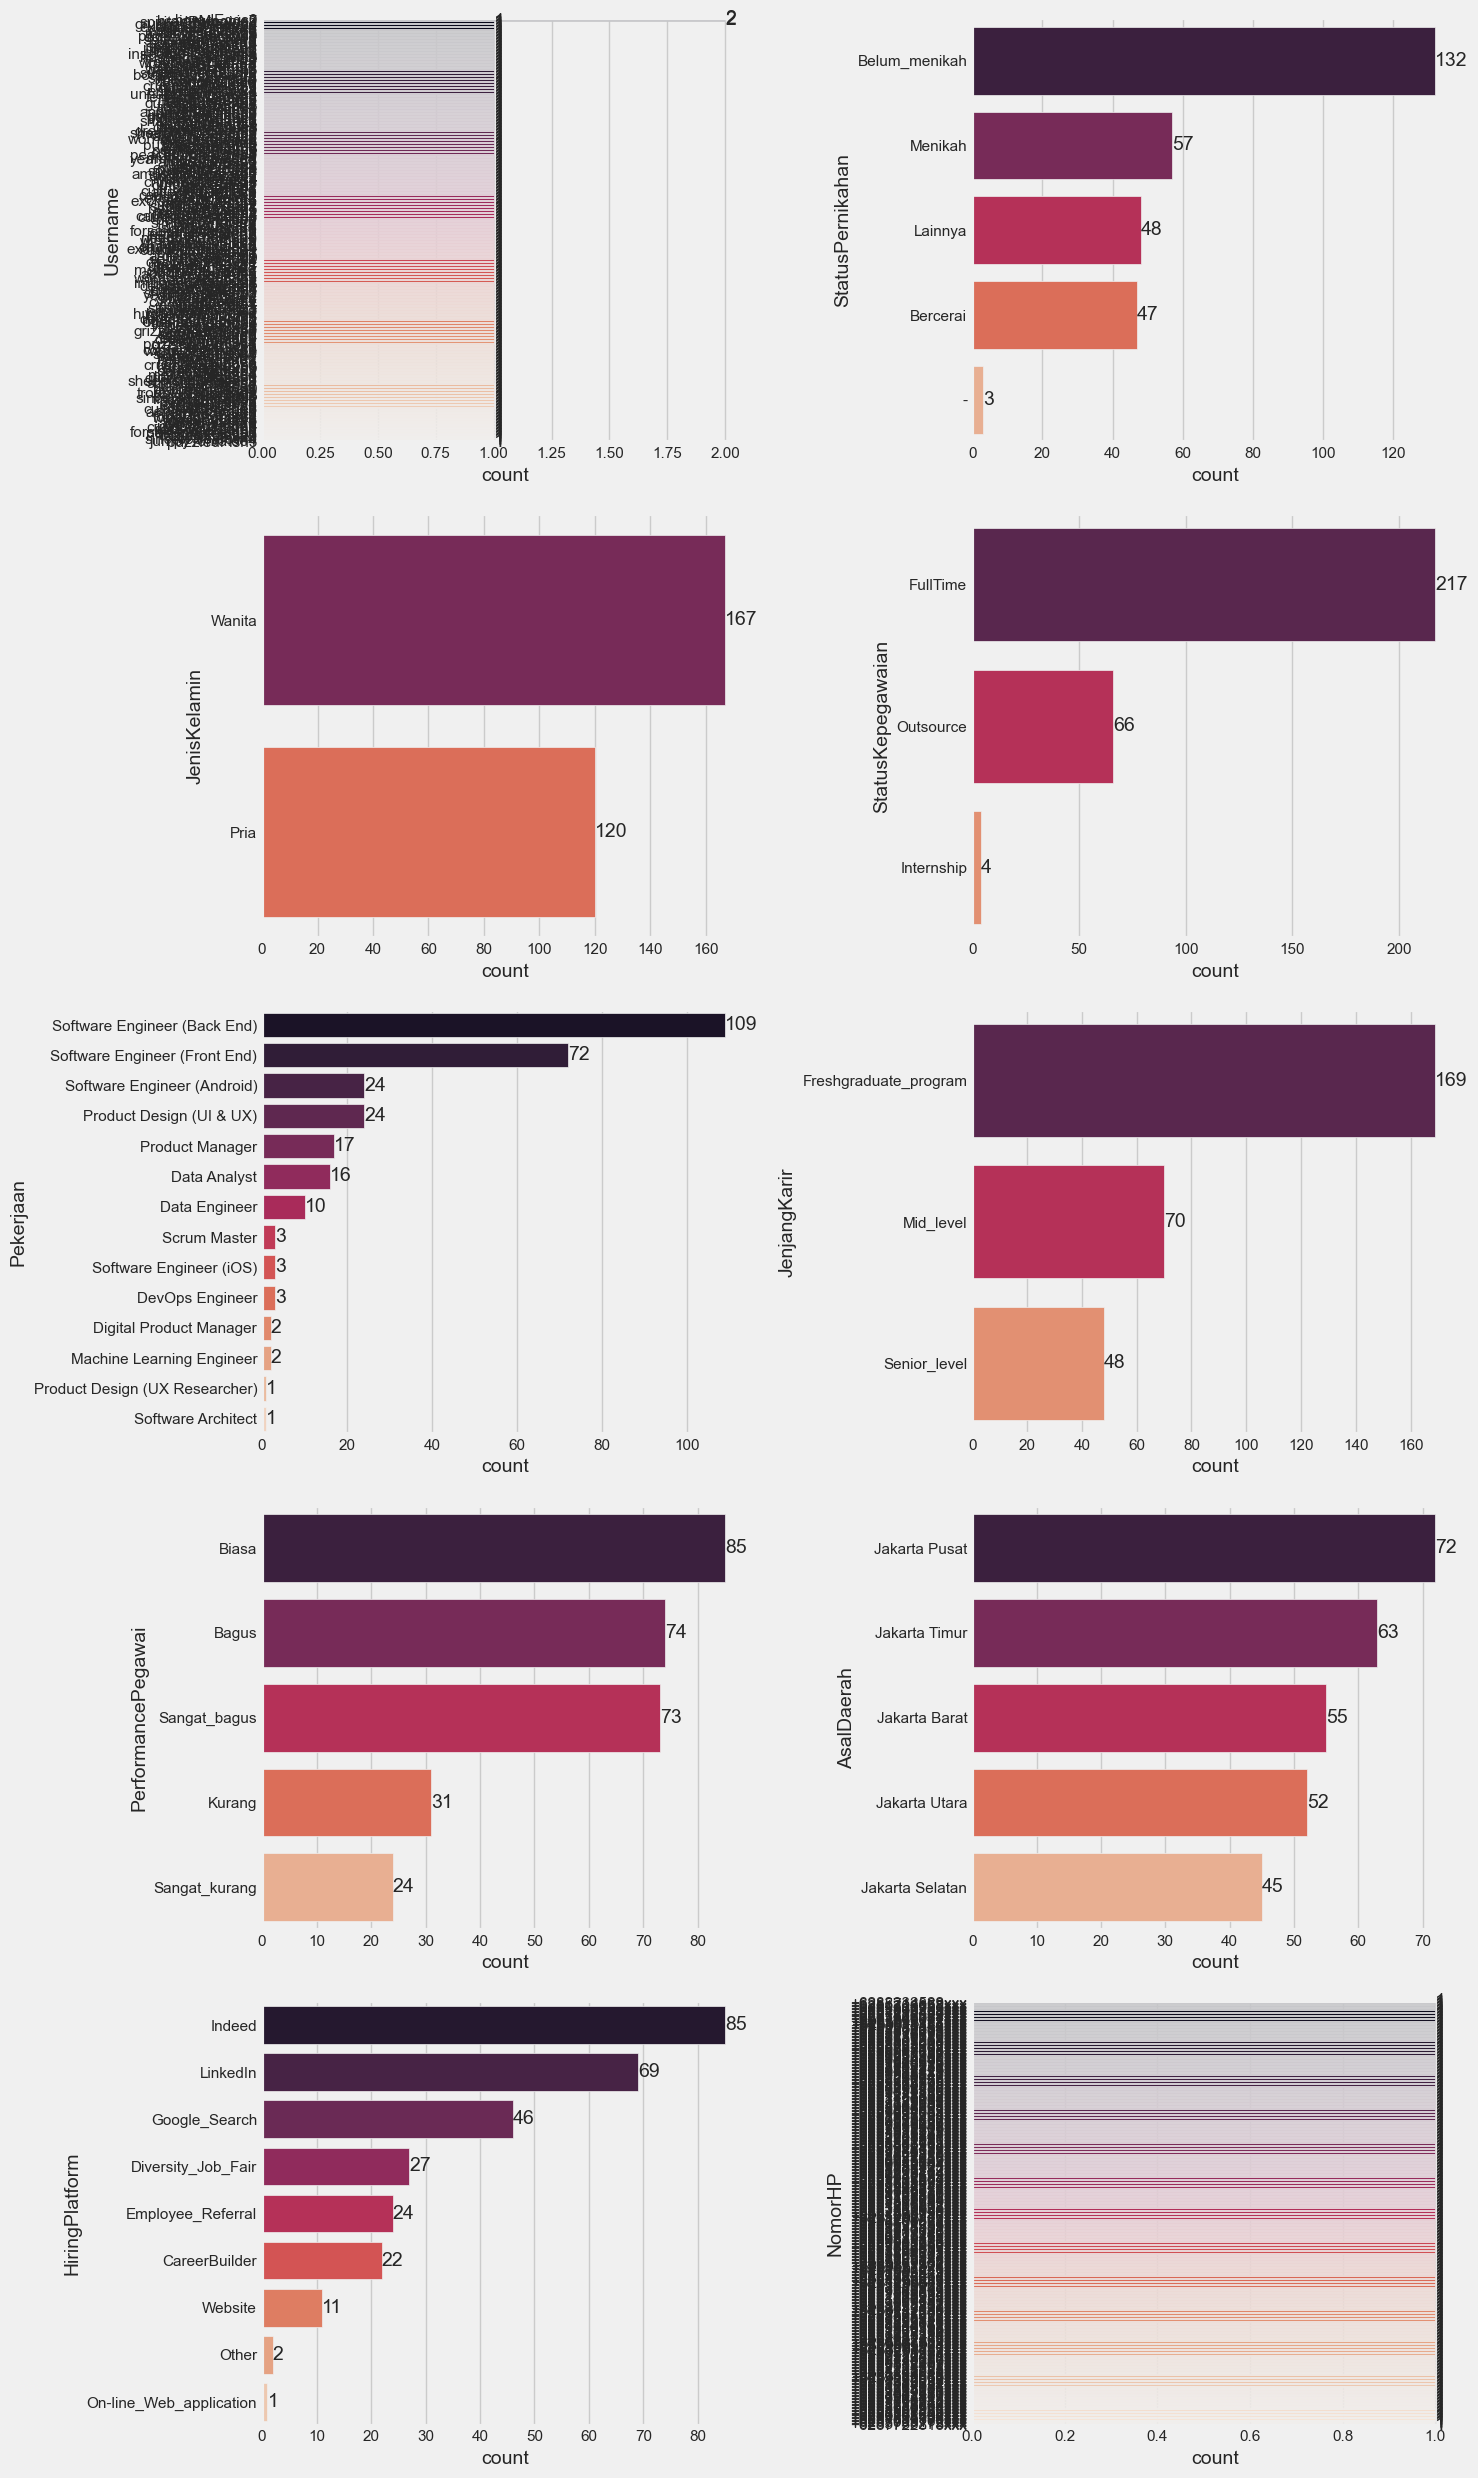

In [876]:
plt.figure(figsize=(15, 25))
for i in range(len(cat)):
    plt.subplot(5, 2, i+1)
    ax = sns.countplot(y=cats[i], data=df_clean, palette='rocket', order=df_clean[cats[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

<Axes: xlabel='SkorKepuasanPegawai', ylabel='AlasanResign'>

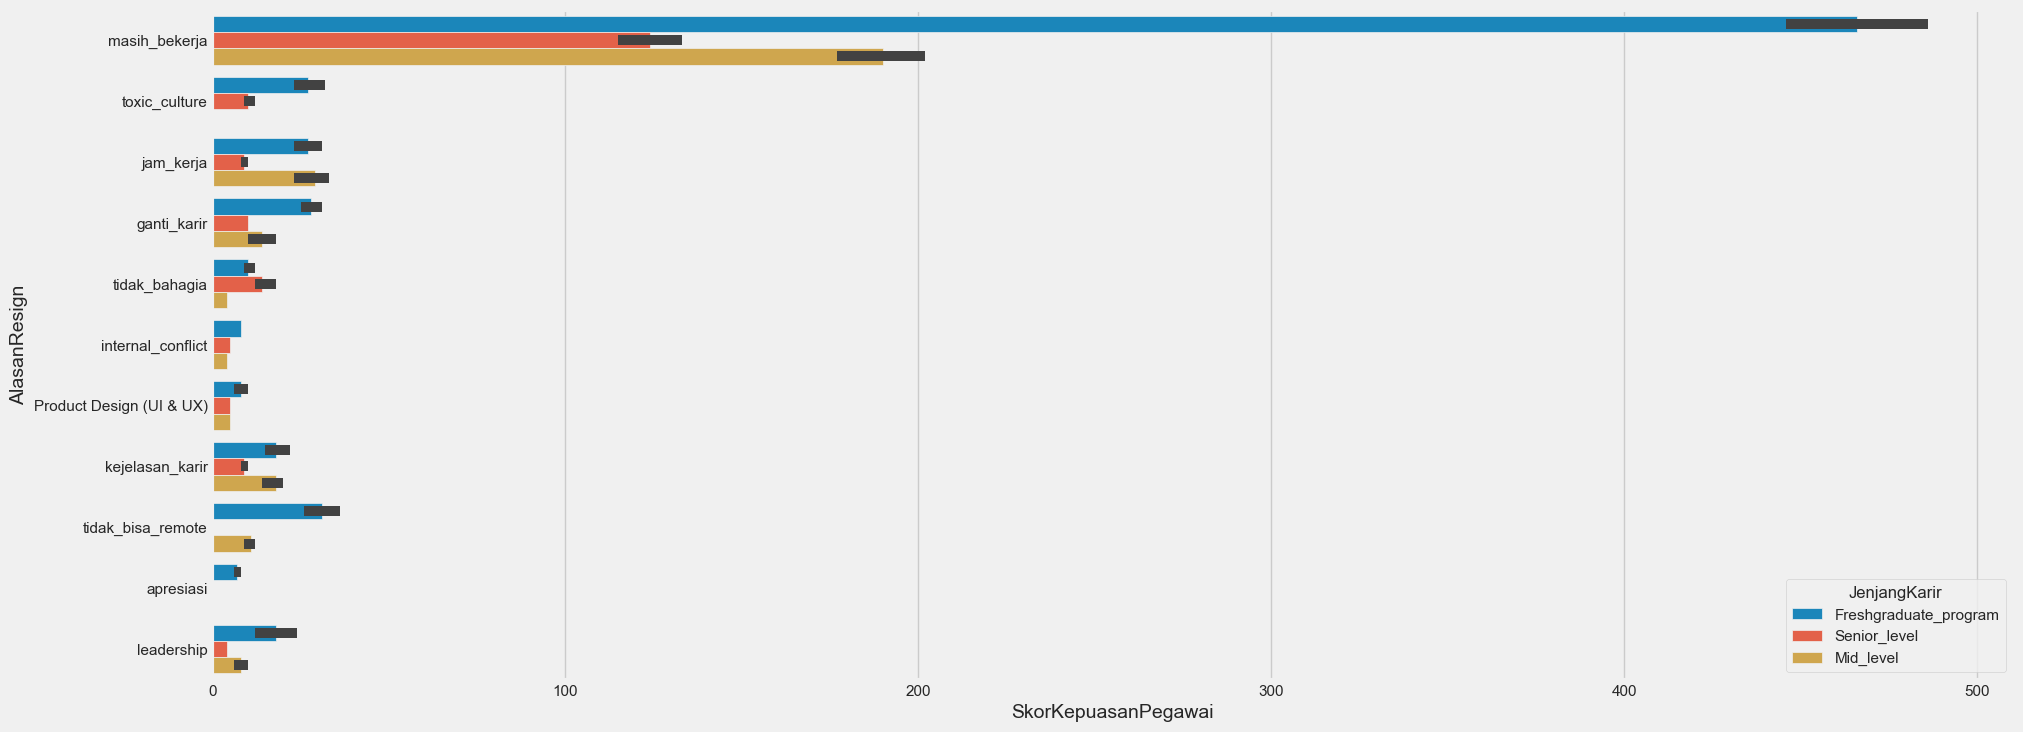

In [877]:
sns.barplot(x="SkorKepuasanPegawai", y="AlasanResign", data=df_clean,  estimator=sum, hue="JenjangKarir")

<Axes: xlabel='SkorKepuasanPegawai', ylabel='AlasanResign'>

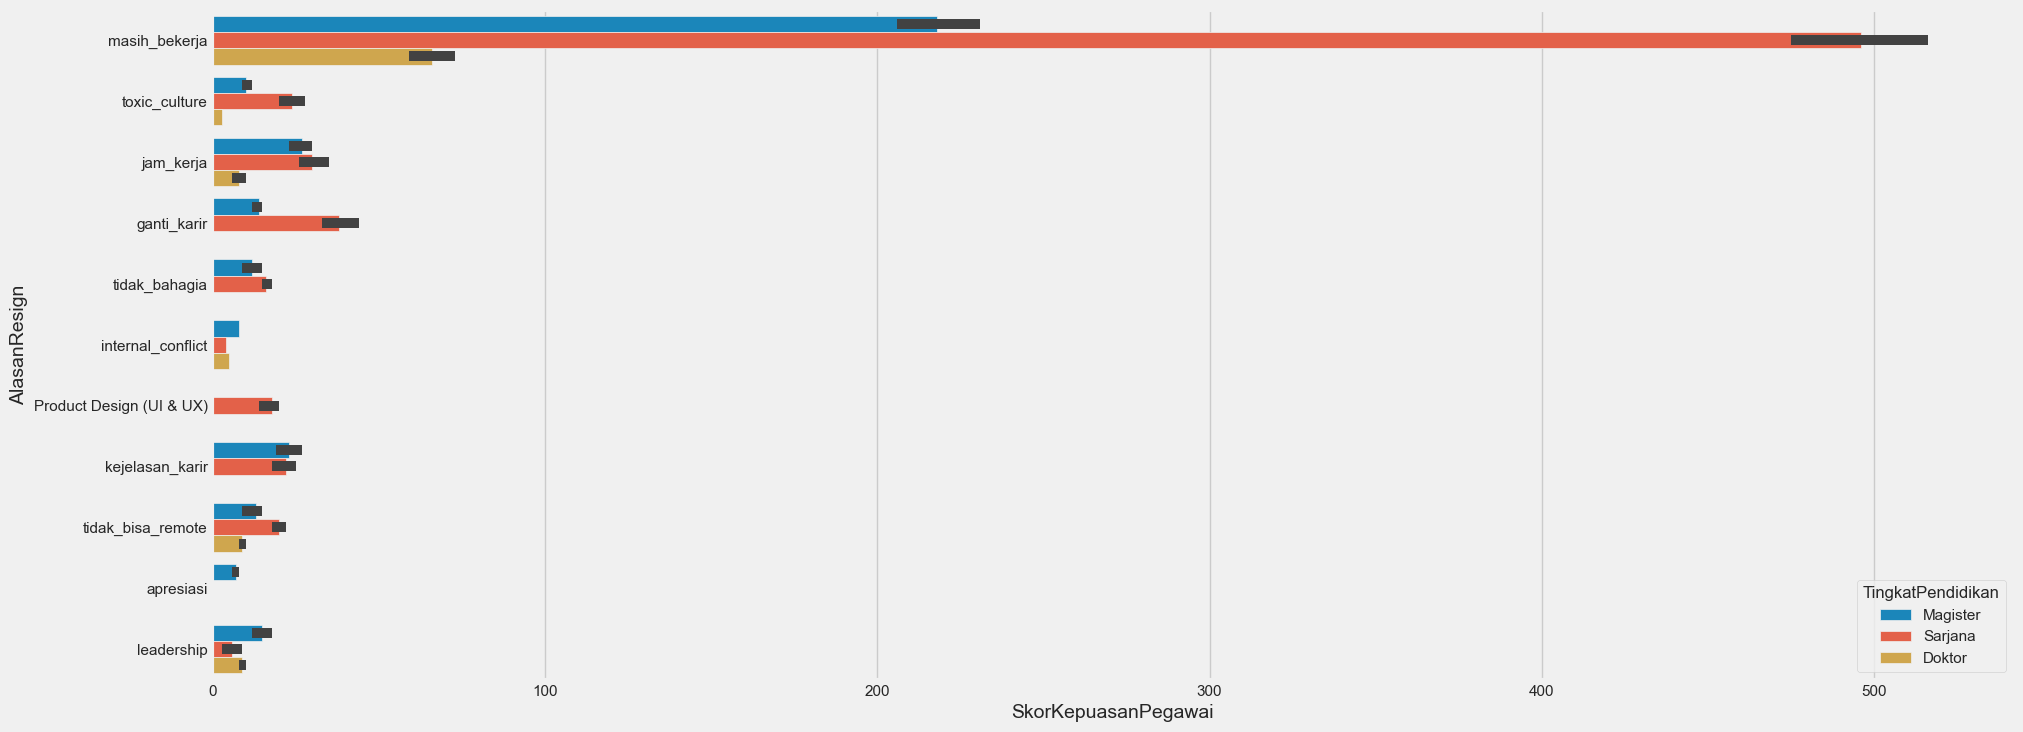

In [878]:
sns.barplot(x="SkorKepuasanPegawai", y="AlasanResign", data=df_clean,  estimator=sum, hue="TingkatPendidikan")

<Axes: xlabel='SkorKepuasanPegawai', ylabel='AlasanResign'>

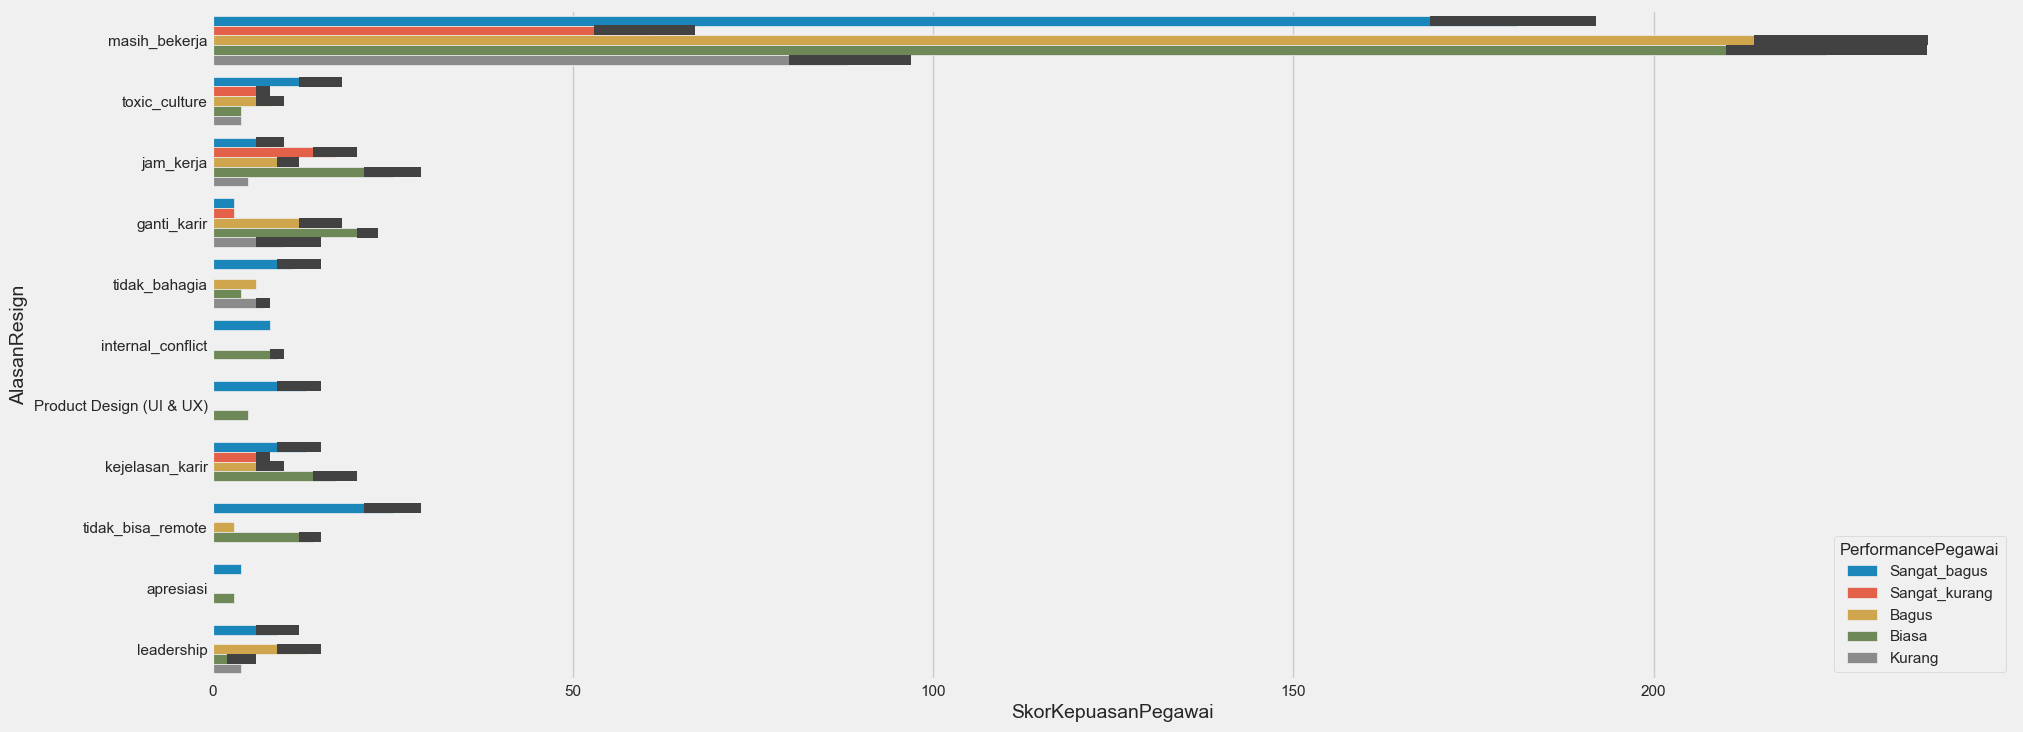

In [879]:
sns.barplot(x="SkorKepuasanPegawai", y="AlasanResign", data=df_clean,  estimator=sum, hue="PerformancePegawai")

<Axes: >

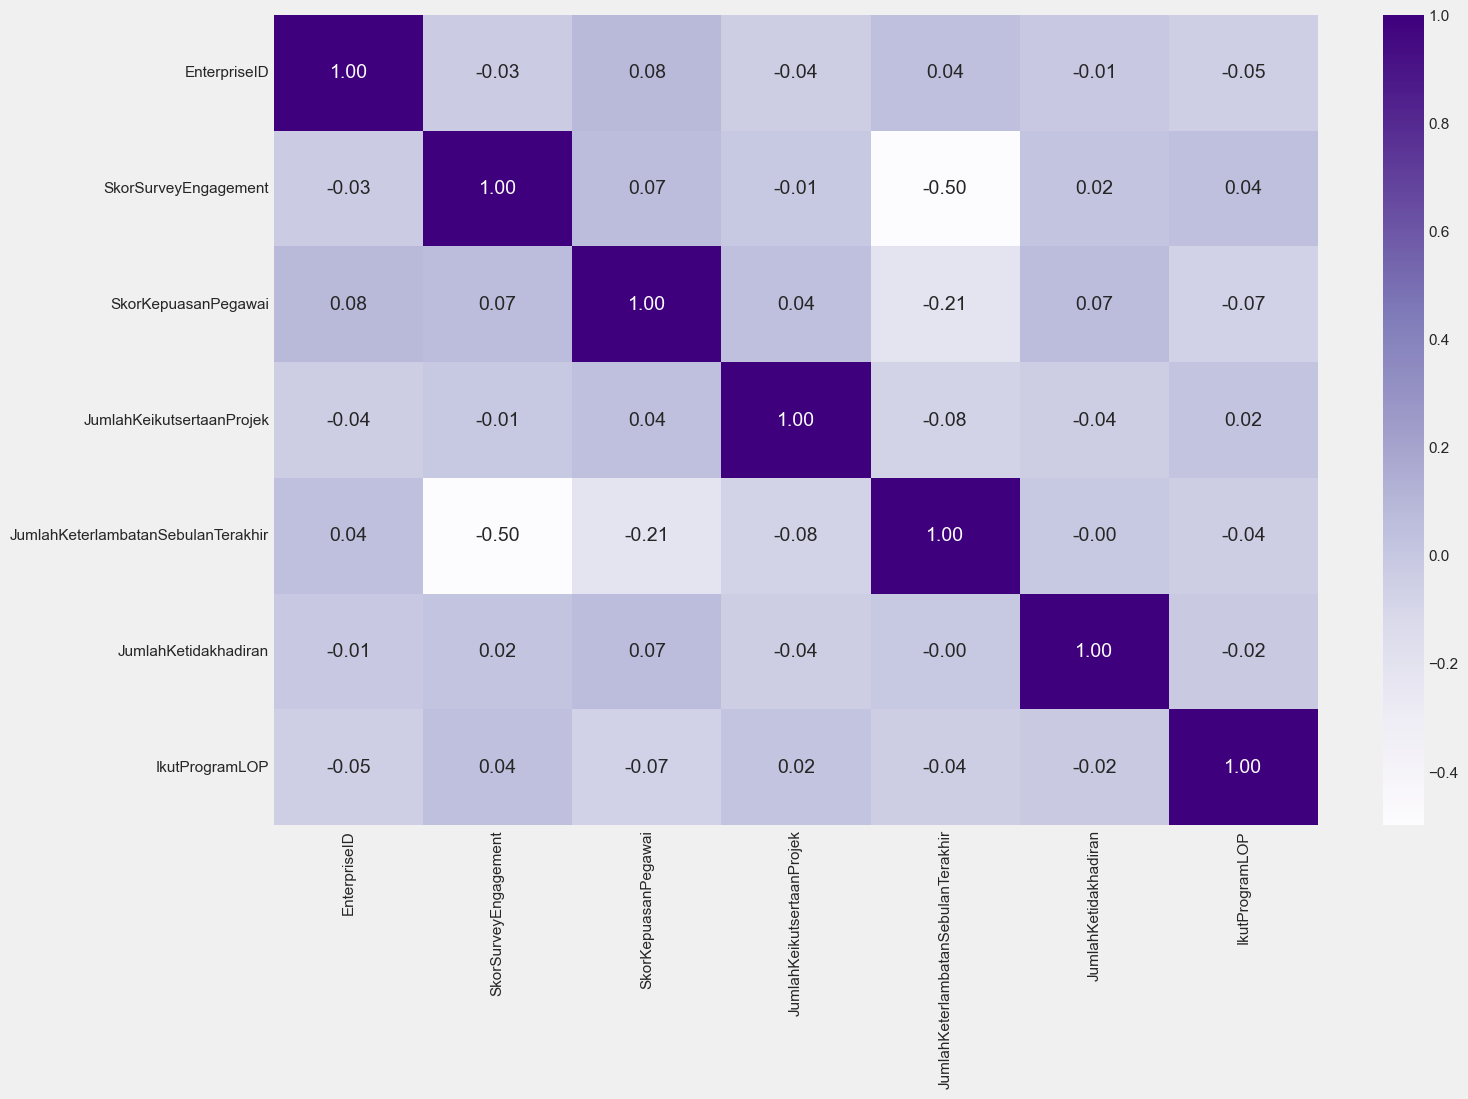

In [880]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_clean[num].corr(), cmap='Purples', annot=True, fmt='.2f')

df_agg = df_clean.copy()

# Derive column 'TahunHiring' from column: 'TanggalHiring'
    # Transform based on the following examples:
    #    TanggalHiring    Output
    # 1: "2011-01-10"  => "2011"
df_agg.insert(22, "TahunHiring", df_clean["TanggalHiring"].str.split("-").str[0])

    # Derive column 'TahunResign' from column: 'TanggalResign'
    # Transform based on the following examples:
    #    TanggalResign    Output
    # 1: "2018-6-16"   => "2018"
df_agg.insert(25, "TahunResign", df_clean["TanggalResign"].str.split("-").str[0])
   
   
    # Performed 1 aggregation grouped on column: 'TahunHiring'
df_agg_th = df_agg.groupby(['TahunHiring']).agg(TanggalHiring_count=('TanggalHiring', 'count')).reset_index()
    
    
    # Rename column 'TanggalHiring_count' to 'Jumlah_Karyawan_Masuk'
df_agg_th = df_agg_th.rename(columns={'TanggalHiring_count': 'Jumlah_Karyawan_Masuk'})





# Annual Report on Employee Number Changes

### **Convert Tanggal dan Agregasi**

---

In [881]:
import datetime

# Konversi kolom TanggalResign dan TahunResign kemudian diambil tahunnya
df_clean['TahunHiring'] = pd.to_datetime(df_clean['TanggalHiring']).dt.year
df_clean['TahunResign'] = df_clean['TanggalResign'].apply(lambda x: pd.to_datetime(x, errors='coerce').year if x != '-' else None)
df_clean['TahunResign'] = df_clean['TahunResign'].astype(float).astype(pd.Int64Dtype())
df_clean.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,<NA>
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,<NA>
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018


In [882]:
df_agg = df_clean.copy()



df_agg['TanggalHiring'] = pd.to_datetime(df_agg['TanggalHiring'], errors='coerce')
df_agg['TanggalResign'] = pd.to_datetime(df_agg['TanggalResign'], errors='coerce')
df_agg['TahunHiring'] = df_agg['TanggalHiring'].dt.year
df_agg['TahunResign'] = df_agg['TanggalResign'].dt.year



In [883]:
    # Performed 1 aggregation grouped on column: 'TahunHiring'
df_agg_th = df_agg.groupby(['TahunHiring']).agg(Jumlah_Karyawan_Masuk=('TanggalHiring', 'count')).reset_index()

    # Performed 2 aggregation grouped on column: 'TahunResign'
df_agg_tr = df_agg.groupby(['TahunResign']).agg(Jumlah_Karyawan_Keluar=('TanggalResign', 'count')).reset_index()

In [884]:
df_agg_th

,TahunHiring,Jumlah_Karyawan_Masuk
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [885]:
df_agg_tr

,TahunResign,Jumlah_Karyawan_Keluar
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


### **Merge/Join Table**

---

In [886]:
df_merge = df_agg_th.merge(df_agg_tr,
                           left_on='TahunHiring',
                           right_on='TahunResign',
                           how='outer')

df_merge

,TahunHiring,Jumlah_Karyawan_Masuk,TahunResign,Jumlah_Karyawan_Keluar
0,2006.0,1.0,<NA>,NaN
1,2007.0,2.0,<NA>,NaN
2,2008.0,2.0,<NA>,NaN
3,2009.0,7.0,<NA>,NaN
4,2010.0,8.0,<NA>,NaN
5,2011.0,76.0,<NA>,NaN
6,2012.0,41.0,<NA>,NaN
7,2013.0,43.0,2013,5.0
8,2014.0,56.0,2014,12.0
9,2015.0,31.0,2015,8.0


### **Imputasi Nilai Kosong dan Modifikasi Tabel**

---

In [887]:
    # Replace missing values with 0 in column: 'Jumlah_Karyawan_Masuk'
df_merge = df_merge.fillna({'Jumlah_Karyawan_Masuk': 0})

    # Replace missing values with 0 in column: 'Jumlah_Karyawan_Keluar'
df_merge = df_merge.fillna({'Jumlah_Karyawan_Keluar': 0})
df_merge.iloc[-2:, df_merge.columns.get_loc('TahunHiring')] = [2019, 2020]

    # Drop column: 'TahunResign'
df_merge = df_merge.drop(columns=['TahunResign'])

df_merge.columns = ['Tahun', 'Jumlah_Karyawan_Masuk', 'Jumlah_Karyawan_Keluar' ]


    # Change column type to int64 for column: 'Jumlah_Karyawan_Keluar'
df_merge = df_merge.astype({'Jumlah_Karyawan_Keluar': 'int64'})

    # Change column type to int64 for column: 'Jumlah_Karyawan_Masuk'
df_merge = df_merge.astype({'Jumlah_Karyawan_Masuk': 'int64'})

    # Change column type to int64 for column: 'TahunHiring'
df_merge = df_merge.astype({'Tahun': 'int64'})

df_merge



,Tahun,Jumlah_Karyawan_Masuk,Jumlah_Karyawan_Keluar
0,2006,1,0
1,2007,2,0
2,2008,2,0
3,2009,7,0
4,2010,8,0
5,2011,76,0
6,2012,41,0
7,2013,43,5
8,2014,56,12
9,2015,31,8


### **Jumlah Karyawan Resign, Masih Bertahan, dan Perubahan Jumlah Karyawan**

---

In [888]:
df_merge['Total_Resign'] = df_merge['Jumlah_Karyawan_Keluar']
df_merge['Total_Bertahan'] = df_merge['Jumlah_Karyawan_Masuk'] - df_merge['Jumlah_Karyawan_Keluar']
df_merge['Perubahan'] = df_merge['Total_Bertahan'] - df_merge['Total_Resign']

df_merge

,Tahun,Jumlah_Karyawan_Masuk,Jumlah_Karyawan_Keluar,Total_Resign,Total_Bertahan,Perubahan
0,2006,1,0,0,1,1
1,2007,2,0,0,2,2
2,2008,2,0,0,2,2
3,2009,7,0,0,7,7
4,2010,8,0,0,8,8
5,2011,76,0,0,76,76
6,2012,41,0,0,41,41
7,2013,43,5,5,38,33
8,2014,56,12,12,44,32
9,2015,31,8,8,23,15


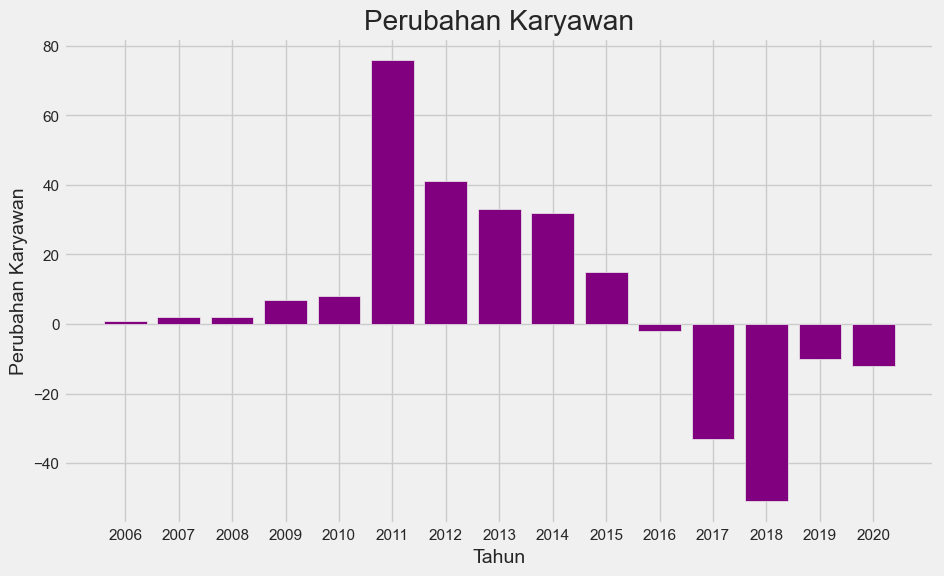

In [889]:
# Sets the plot size
plt.figure(figsize=(10, 6))

# Make a plot of increase and decrease of employees
plt.bar(df_merge.index, df_merge['Perubahan'], color='purple')

# Add x and y axis labels
plt.xlabel('Tahun')
plt.ylabel('Perubahan Karyawan')

# Added plot title
plt.title('Perubahan Karyawan')

# Sets the position and label on the x-axis
plt.xticks(df_merge.index, df_merge['Tahun'], rotation=0)

# Display plots
plt.show()

### **INTERPRETASI**

Dari hasil visualisasi menggunakan Waterfall Chart, terlihat bahwa penurunan jumlah karyawan dimulai pada tahun 2016. Namun pada tahun 2006 - 2011 terjadi peningkatan secara bertahap sampai pada puncaknya tahun 2011. Analisis total perubahan per tahun didasarkan pada selisih antara jumlah karyawan yang bertahan dan jumlah karyawan yang mengundurkan diri. Pada tahun 2018, terjadi aktivitas perekrutan dan pengunduran diri yang paling signifikan, yang dapat dilihat dari arah negatif garis Waterfall Chart. Hal ini mengindikasikan situasi yang menunjukkan perusahaan dalam kondisi kurang menguntungkan, karena jumlah karyawan yang mengundurkan diri lebih banyak daripada jumlah karyawan yang bergabung atau bertahan.

Hasil ini mencerminkan pentingnya perbaikan manajemen Sumber Daya Manusia dan jenjang karir pada perusahaan. Perusahaan perlu melakukan peningkatan untuk memastikan retensi karyawan yang lebih baik dan menghindari biaya tambahan yang terkait dengan proses rekrutmen yang terus-menerus.

# Resign Reason Analysis for Employee Attrition Management Strategy

In [890]:
df_agg.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,<NA>
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,<NA>
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018


### **Membuat DataFrame Terpisah**

---

In [891]:
df_not_resigned = df_agg[df_agg['TahunResign'].isnull()]
df_not_resigned_count = df_not_resigned.groupby('Pekerjaan').size().reset_index(name='jumlah_karyawan_aktif')
df_not_resigned_count

,Pekerjaan,jumlah_karyawan_aktif
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [892]:
df_resigned = df_agg[df_agg['TahunResign'].notnull()]
df_resigned_count = df_resigned.groupby('Pekerjaan').size().reset_index(name='jumlah_karyawan_resign')
df_resigned_count

,Pekerjaan,jumlah_karyawan_resign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


### **Merge/Join DataFrame**

---

In [893]:
df_merge2 = df_not_resigned_count.merge(df_resigned_count,
                                        on='Pekerjaan',
                                        how='outer')

df_merge2

,Pekerjaan,jumlah_karyawan_aktif,jumlah_karyawan_resign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,NaN
3,Digital Product Manager,2,NaN
4,Machine Learning Engineer,2,NaN
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,NaN
7,Product Manager,11,6.0
8,Scrum Master,3,NaN
9,Software Architect,1,NaN


### **Imputasi Nilai Kosong dan Modifikasi Tabel**

---

In [894]:

    # Replace missing values with 0 in column: 'jumlah_karyawan_resign'
df_merge2 = df_merge2.fillna({'jumlah_karyawan_resign': 0})
    # Change column type to int64 for column: 'jumlah_karyawan_resign'
df_merge2 = df_merge2.astype({'jumlah_karyawan_resign': 'int64'})

# Membuat kolom total karyawan
df_merge2['Total_karyawan'] = df_merge2['jumlah_karyawan_aktif'] + df_merge2['jumlah_karyawan_resign']

# Persentase jumlah karyawan aktif
df_merge2['Persentase_karyawan_aktif'] = round((df_merge2['jumlah_karyawan_aktif'] / df_merge2['Total_karyawan']) * 100,2)


df_merge2



,Pekerjaan,jumlah_karyawan_aktif,jumlah_karyawan_resign,Total_karyawan,Persentase_karyawan_aktif
0,Data Analyst,8,8,16,50.00
1,Data Engineer,7,3,10,70.00
2,DevOps Engineer,3,0,3,100.00
3,Digital Product Manager,2,0,2,100.00
4,Machine Learning Engineer,2,0,2,100.00
5,Product Design (UI & UX),15,9,24,62.50
6,Product Design (UX Researcher),1,0,1,100.00
7,Product Manager,11,6,17,64.71
8,Scrum Master,3,0,3,100.00
9,Software Architect,1,0,1,100.00


### **Membuat Plot**

---

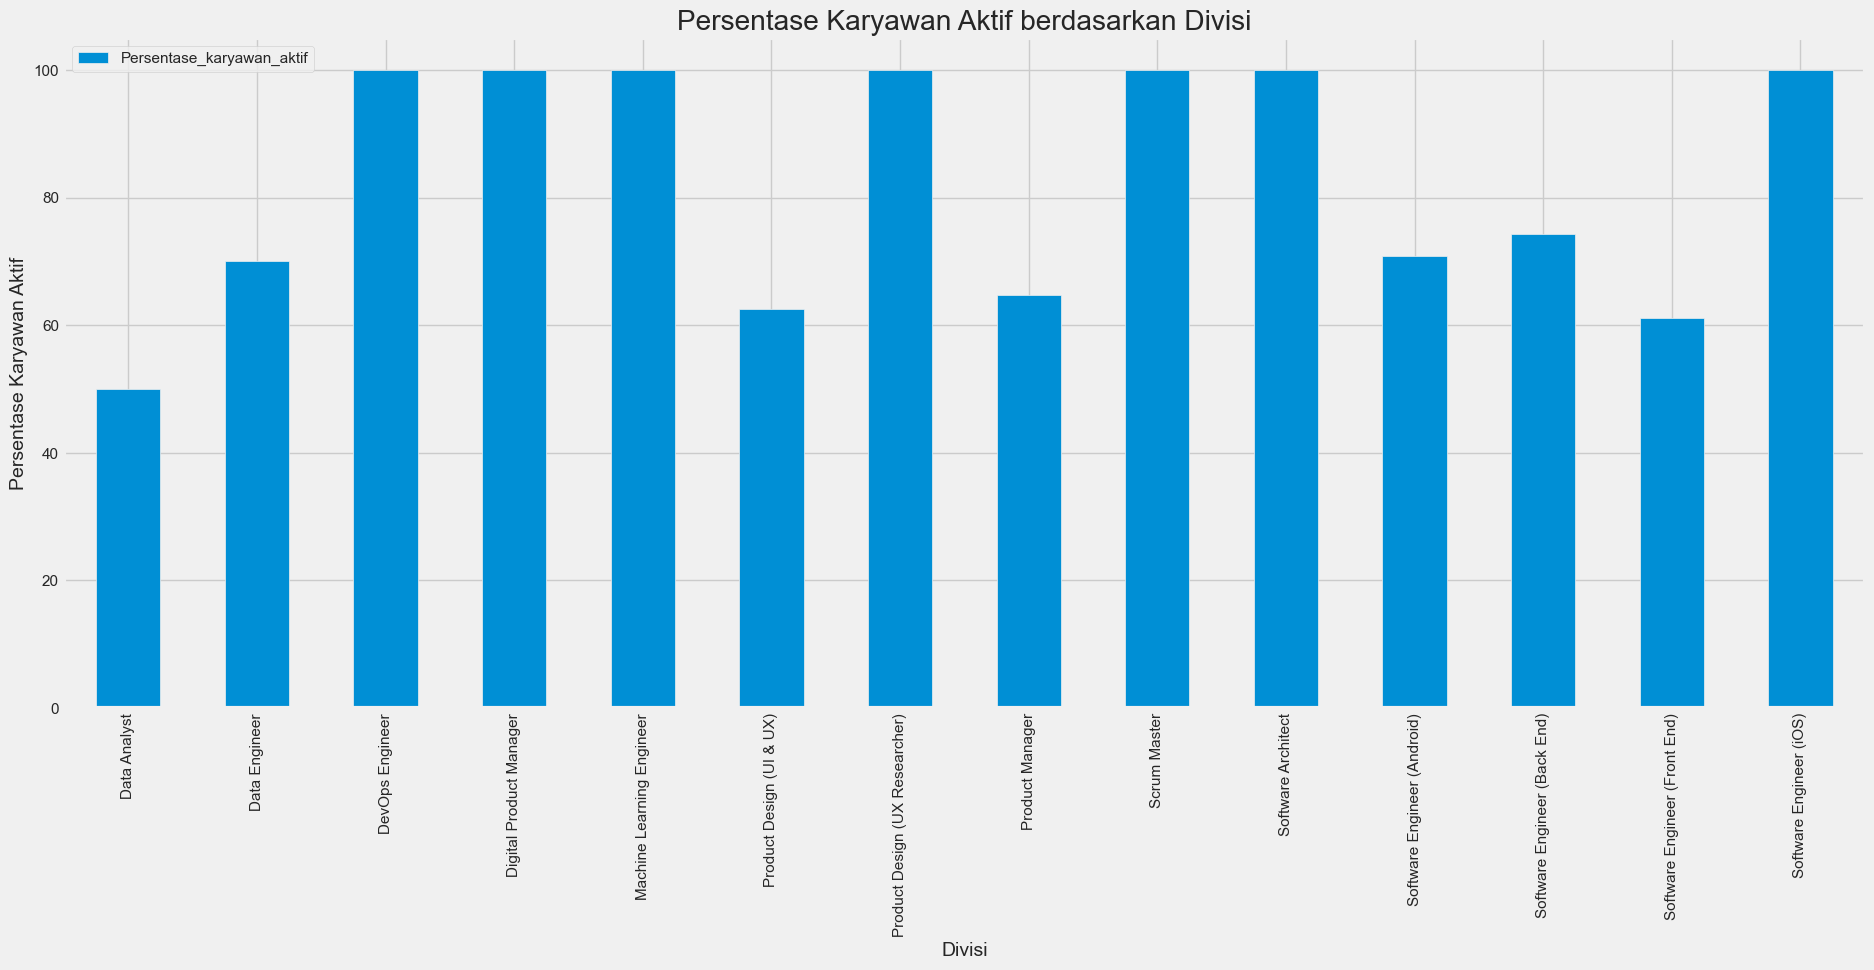

In [895]:
df_merge2.plot(kind='bar', x='Pekerjaan', y='Persentase_karyawan_aktif')
plt.xlabel('Divisi')
plt.ylabel('Persentase Karyawan Aktif')
plt.xticks(rotation=90)
plt.title('Persentase Karyawan Aktif berdasarkan Divisi')
plt.show()

In [896]:
df_resign_agg = df_resigned.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Total_resign')
df_resign_agg

,JenjangKarir,PerformancePegawai,AlasanResign,Total_resign
0,Freshgraduate_program,Bagus,ganti_karir,3
1,Freshgraduate_program,Bagus,jam_kerja,3
2,Freshgraduate_program,Bagus,kejelasan_karir,1
3,Freshgraduate_program,Bagus,leadership,2
4,Freshgraduate_program,Bagus,tidak_bisa_remote,1
5,Freshgraduate_program,Bagus,toxic_culture,2
6,Freshgraduate_program,Biasa,apresiasi,1
7,Freshgraduate_program,Biasa,ganti_karir,3
8,Freshgraduate_program,Biasa,internal_conflict,1
9,Freshgraduate_program,Biasa,jam_kerja,2


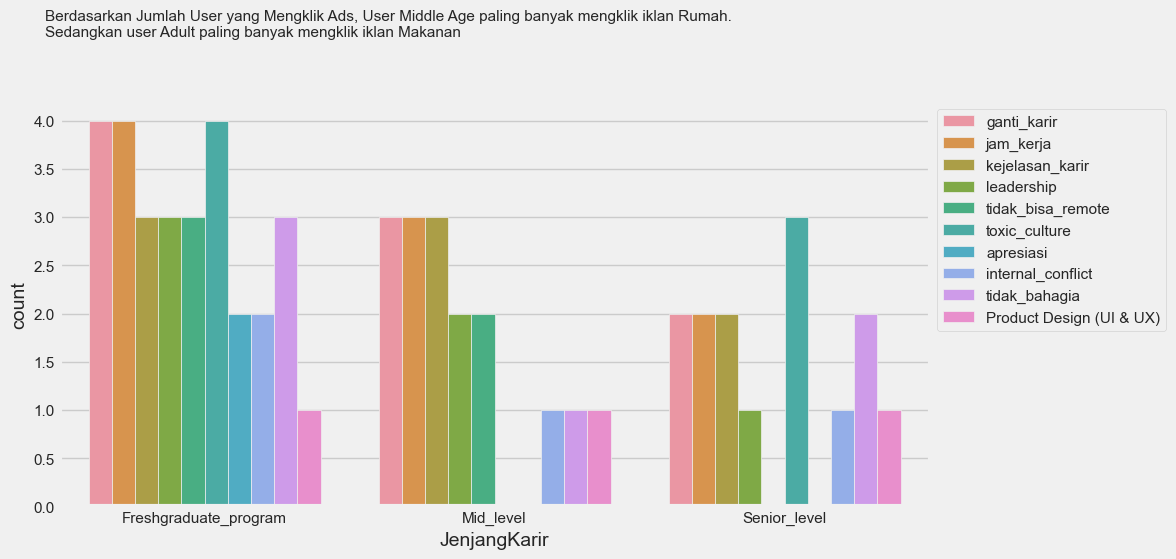

In [897]:
plt.figure(figsize=(10,5))
sns.countplot(x='JenjangKarir', hue='AlasanResign',data=df_resign_agg)
plt.text(y = 5, x = -0.55, s = 'Berdasarkan Jumlah User yang Mengklik Ads, User Middle Age paling banyak mengklik iklan Rumah. \nSedangkan user Adult paling banyak mengklik iklan Makanan', 
         ha='left', va='center', size=11)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

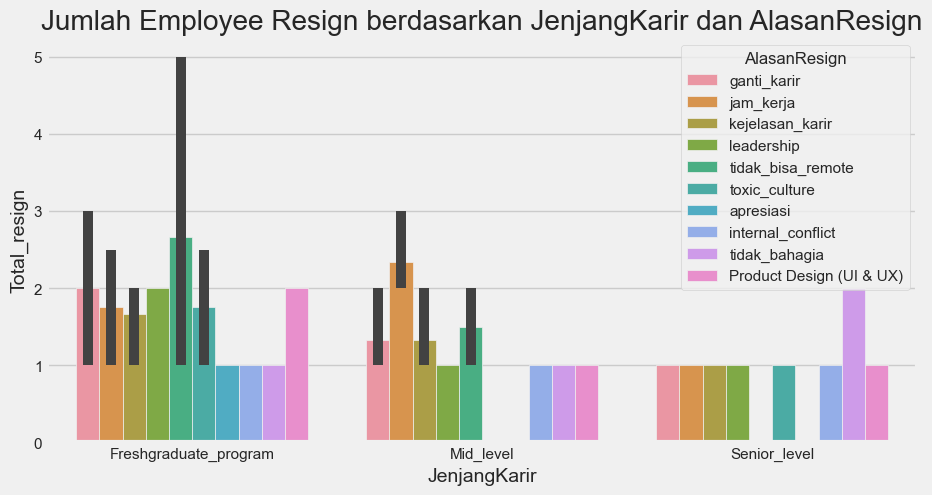

In [898]:
plt.figure(figsize=(10,5))

sns.barplot(data=df_resign_agg.reset_index(), x='JenjangKarir', y='Total_resign', hue='AlasanResign')
plt.xlabel('JenjangKarir')
plt.ylabel('Total_resign')
plt.title('Jumlah Employee Resign berdasarkan JenjangKarir dan AlasanResign')
plt.show()

### **INTERPRETASI**

Hasil pengamatan dan analisis grafik mengungkapkan beberapa pola yang signifikan dalam tingkat resignasi karyawan pada tiga tingkatan berbeda: Fresh Graduate, Middle Level, dan Senior. Pada tingkat Fresh Graduate, mayoritas karyawan mengundurkan diri disebabkan oleh ketidakmampuan melakukan pekerjaan dari jarak jauh (remote). Pada tingkat Middle Level, alasan utama resign adalah jam kerja yang terlalu padat. Sedangkan pada tingkat Senior, faktor utama adalah ketidakbahagiaan dalam pekerjaan.

Untuk mengatasi tantangan ini, kami merekomendasikan langkah-langkah strategis sebagai berikut:

1. Pada level Fresh Graduate disarankan untuk memberikan peluang kepada karyawan tingkat Fresh Graduate untuk mengadopsi model kerja jarak jauh (remote work) atau menerapkan pola kerja hybrid. Sebagai contoh, pola kerja hybrid ini dapat mencakup tiga hari kerja dari kantor dan dua hari kerja dari lingkungan rumah. Keputusan ini mendorong peningkatan fleksibilitas dalam lingkungan kerja, memungkinkan para Fresh Graduate untuk mengejar karir mereka sambil menjaga keseimbangan antara kehidupan kerja dan kehidupan pribadi. Dengan pendekatan ini, perusahaan memberikan peluang bagi karyawan muda ini untuk berkembang dan berkontribusi secara efisien sambil tetap memperhatikan kesejahteraan mereka.

2. Pada level Middle dalam kasus di mana alasan utama pengunduran diri berkaitan dengan beban kerja yang berlebihan, perusahaan memiliki kesempatan untuk mengambil tindakan proaktif. Salah satu langkah yang dapat dipertimbangkan adalah peningkatan jumlah karyawan di tim atau departemen terkait. Dengan demikian, perusahaan dapat mencapai distribusi beban kerja yang lebih merata, mengurangi tekanan yang ditanggung oleh individu, dan secara signifikan meningkatkan tingkat produktivitas. Langkah-langkah ini mencerminkan komitmen perusahaan terhadap kesejahteraan karyawan dan upaya untuk menciptakan lingkungan kerja yang seimbang dan produktif.

3. Pada level senior, perusahaan harus memberikan perhatian yang lebih serius terhadap fasilitas dan program kesejahteraan karyawan. Ini mencakup implementasi program kesehatan, kegiatan kebugaran, inisiatif pengembangan pribadi, serta kesadaran terhadap keseimbangan antara pekerjaan dan kehidupan pribadi. Langkah-langkah ini akan menciptakan lingkungan kerja yang seimbang dan nyaman, yang pada gilirannya dapat secara signifikan meningkatkan tingkat kepuasan dan retensi karyawan.

# Build an Automated Resignation Behavior Prediction using Machine Learning

### **Check Kembali Data PreProcessing**

---

In [899]:
df_clean.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,<NA>
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,<NA>
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018


In [900]:
# Change column type to int64 for column: 'IkutProgramLOP'
df_clean = df_clean.astype({'IkutProgramLOP': 'int64'})


### Handling Missing Values

In [901]:
df_clean.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
IkutProgramLOP                          0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                     

In [902]:
df_clean = df_clean.fillna({'TahunResign': 0})

In [903]:
df_clean.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
IkutProgramLOP                        0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
TahunHiring                           0


### Handling Duplicate Values

In [904]:
df_clean.duplicated().sum()

0

### Group Columns by Type

In [905]:
# mengelompokan data
cats = df_clean.select_dtypes(include='object').columns.tolist()
nums = df_clean.select_dtypes(include=('int64', 'int32', 'int16', 'float64', 'float32', 'float16')).columns.tolist()

### Handling Outliers

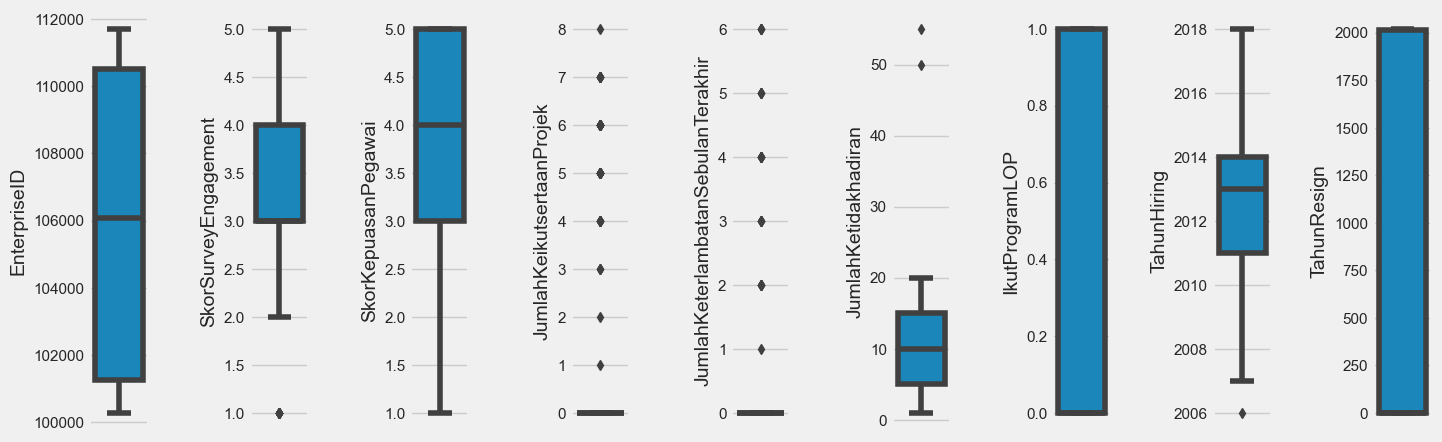

In [906]:
plt.figure(figsize= (15,5))
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = df_clean[nums[i]], orient='v')
    plt.tight_layout(pad=2)

In [907]:

    # Change column type to int64 for column: 'JumlahKetidakhadiran'
df_clean = df_clean.astype({'JumlahKetidakhadiran': 'int64'})
    # Change column type to int64 for column: 'JumlahKeterlambatanSebulanTerakhir'
df_clean = df_clean.astype({'JumlahKeterlambatanSebulanTerakhir': 'int64'})
    # Change column type to int64 for column: 'JumlahKeikutsertaanProjek'
df_clean = df_clean.astype({'JumlahKeikutsertaanProjek': 'int64'})
    # Change column type to int64 for column: 'SkorKepuasanPegawai'
df_clean = df_clean.astype({'SkorKepuasanPegawai': 'int64'})


In [908]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))

for col in ['EnterpriseID',	'SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','IkutProgramLOP']:
    zscore = abs(stats.zscore(df_clean[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_clean = df_clean[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 287
Jumlah baris setelah memfilter outlier: 273


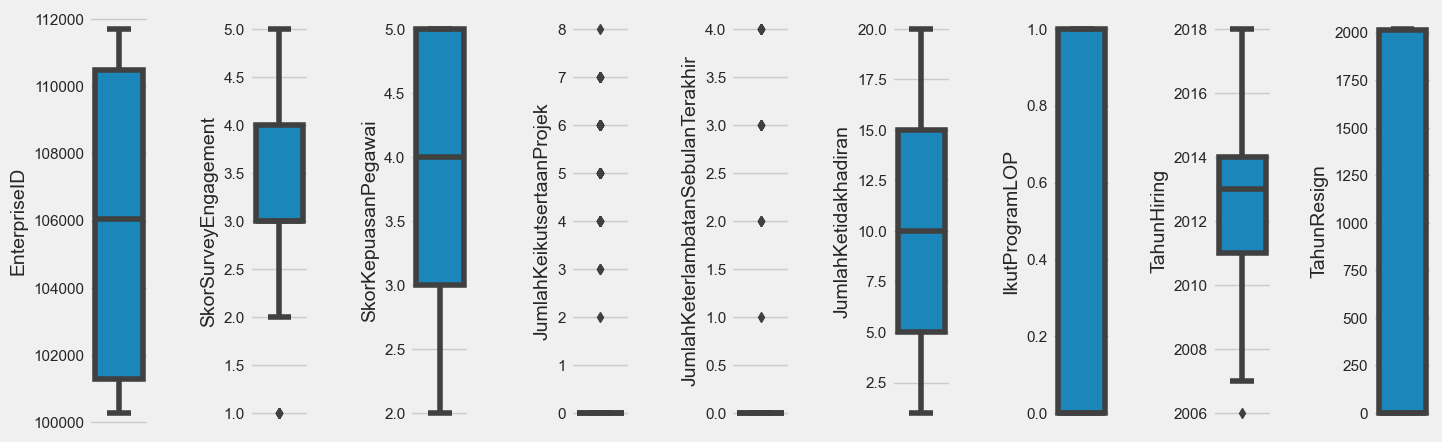

In [909]:
plt.figure(figsize= (15,5))
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = df_clean[nums[i]], orient='v')
    plt.tight_layout(pad=2)

### **Feature Engenering & Feature Encoding**

---

In [910]:
df_fe = df_clean.copy()

In [911]:
# Membuat kolom 'Resign' berdasarkan 'TahunResign'
df_fe['Resign'] = np.where(df_fe['TahunResign'] > 0, 'Resign', 'Belum Resign')

# Buat kolom 'lama_bekerja' berdasarkan 'TahunResign' dan 'TahunHiring'
df_fe['lama_bekerja'] = np.where(df_fe['TahunResign'] == 0, 2020 - df_fe['TahunHiring'], df_fe['TahunResign'] - df_fe['TahunHiring'])

In [912]:
df_fe = df_fe.astype({'lama_bekerja': 'int64'})


In [913]:
df_fe.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,Resign,lama_bekerja
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,1,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,2011,0,Belum Resign,9
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018,Resign,4
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014,Resign,3
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,2014,0,Belum Resign,6
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018,Resign,5


In [914]:
# Label encoding

mapping_StatusKepegawaian = { 'Internship' : 0, 'Outsource' : 1, 'FullTime' : 2 }
mapping_JenjangKarir = { 'Freshgraduate_program' : 0, 'Mid_level' : 1, 'Senior_level' : 2 }
mapping_TingkatPendidikan = { 'Sarjana' : 0, 'Magister' : 1, 'Doktor' : 2 }
mapping_PerformancePegawai = { 'Sangat_kurang' : 0, 'Kurang' : 1, 'Biasa' : 2, 'Bagus' : 3, 'Sangat_bagus' : 4 }
mapping_Resign = { 'Belum Resign' : 0, 'Resign' : 1}

df_fe['StatusKepegawaian'] = df_fe['StatusKepegawaian'].map(mapping_StatusKepegawaian)
df_fe['JenjangKarir'] = df_fe['JenjangKarir'].map(mapping_JenjangKarir)
df_fe['TingkatPendidikan'] = df_fe['TingkatPendidikan'].map(mapping_TingkatPendidikan)
df_fe['PerformancePegawai'] = df_fe['PerformancePegawai'].map(mapping_PerformancePegawai)
df_fe['Resign'] = df_fe['Resign'].map(mapping_Resign)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_fe['AlasanResign'] = label_encoder.fit_transform(df_fe['AlasanResign'])
df_fe['Pekerjaan'] = label_encoder.fit_transform(df_fe['Pekerjaan'])

In [915]:
df_fe.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign,Resign,lama_bekerja
0,spiritedPorpoise3,111065,Belum_menikah,Pria,1,11,0,4,Jakarta Timur,Employee_Referral,...,1,7,1972-07-01,2011-01-10,2016-2-15,-,2011,0,0,9
1,jealousGelding2,106080,Belum_menikah,Pria,2,0,0,0,Jakarta Utara,Website,...,1,10,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018,1,4
2,pluckyMuesli3,106452,Menikah,Pria,2,12,0,3,Jakarta Timur,Indeed,...,1,4,1974-01-07,2011-01-10,2016-01-10,2014-9-24,2011,2014,1,3
3,stressedTruffle1,106325,Belum_menikah,Pria,1,12,0,3,Jakarta Pusat,LinkedIn,...,0,7,1979-11-24,2014-2-17,2020-02-04,-,2014,0,0,6
4,shyTermite7,111171,Belum_menikah,Wanita,2,7,0,3,Jakarta Timur,LinkedIn,...,0,2,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018,1,5


<Axes: >

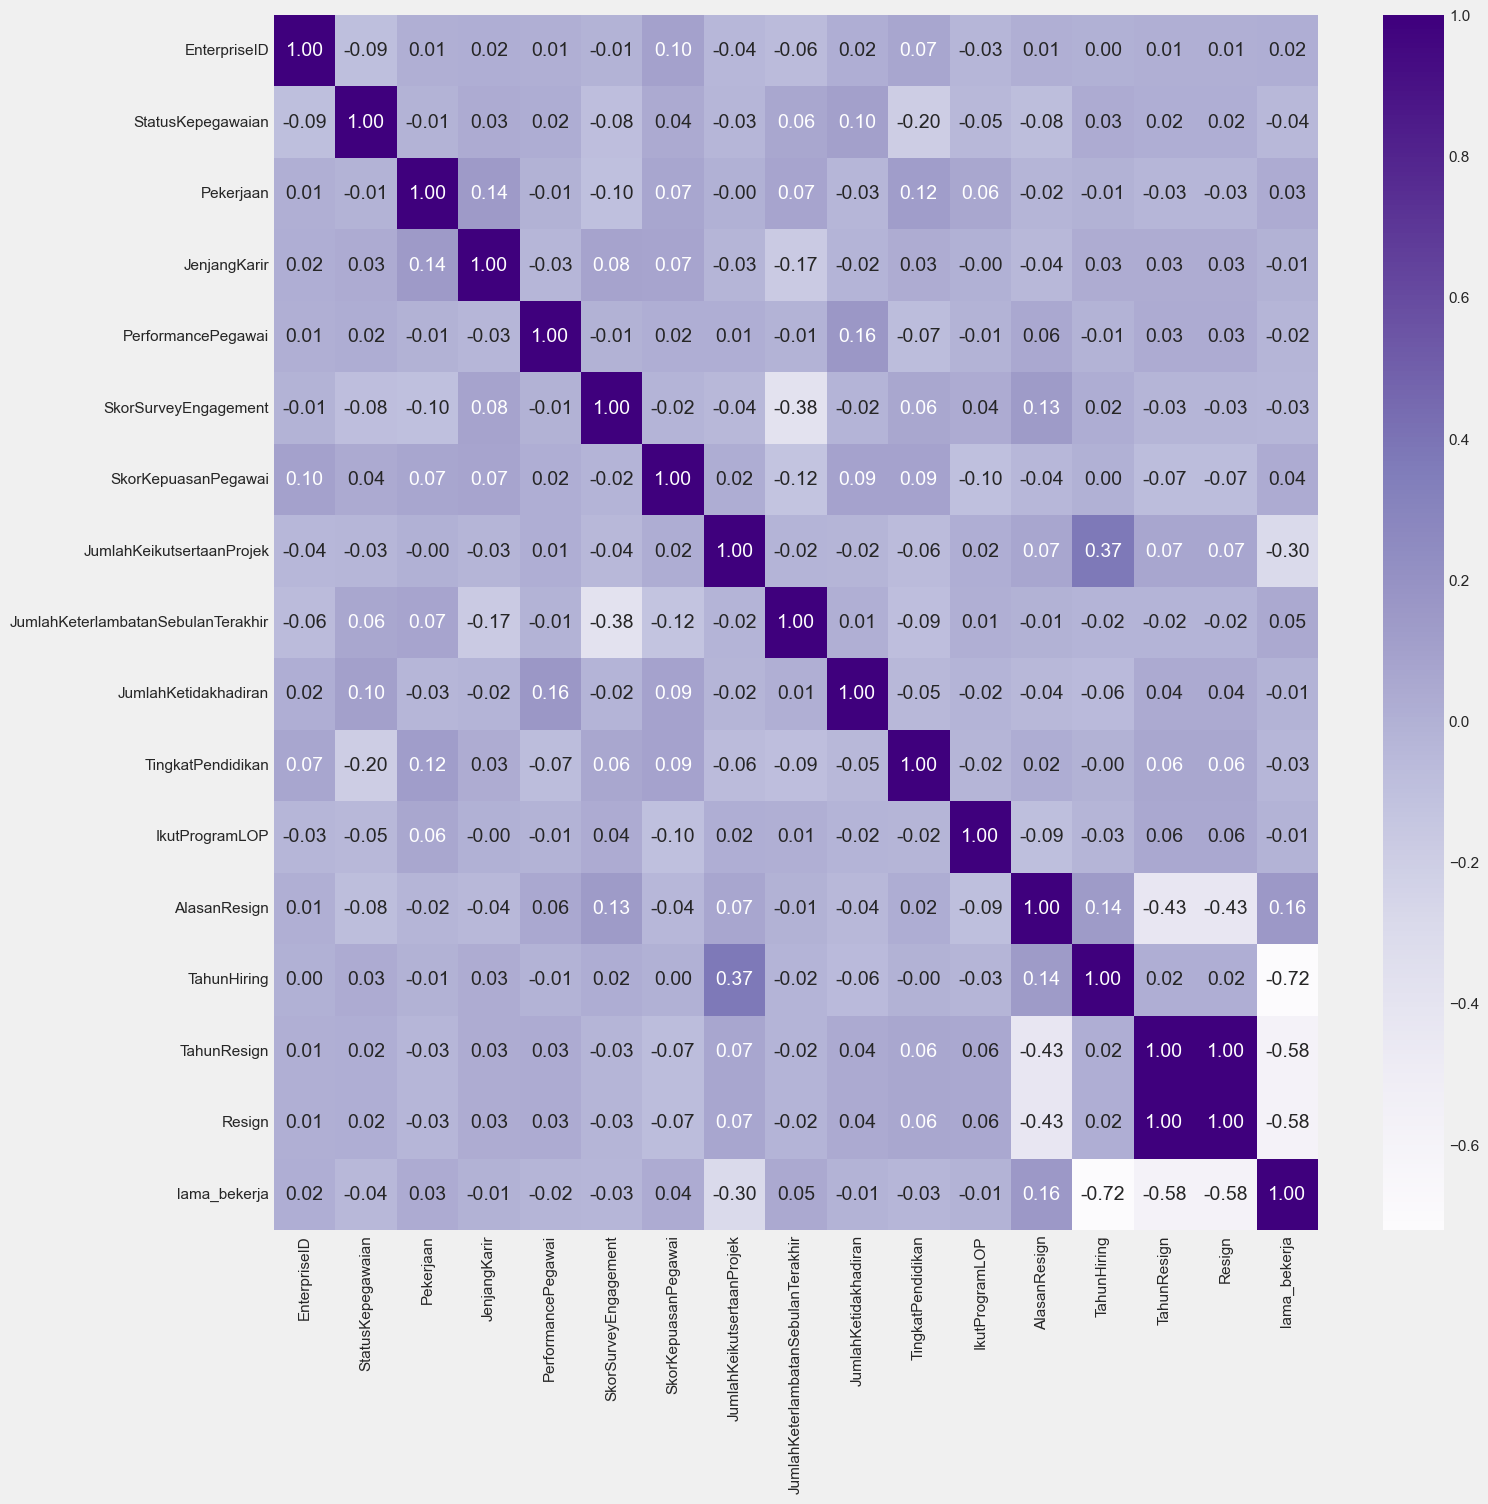

In [916]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_fe.corr(), cmap='Purples', annot=True, fmt='.2f')

In [917]:
df_sd = df_fe.drop(columns=['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin', 'AsalDaerah', 'HiringPlatform', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'TahunHiring', 'TahunResign'   ]).copy()  # Menghapus kolom 'Kolom1' dan 'Kolom2'


In [918]:
df_sd.head()

,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,IkutProgramLOP,AlasanResign,Resign,lama_bekerja
0,1,11,0,4,4,4,0,0,9,1,1,7,0,9
1,2,0,0,0,4,4,4,0,3,0,1,10,1,4
2,2,12,0,3,4,3,0,0,11,1,1,4,1,3
3,1,12,0,3,3,3,0,4,6,0,0,7,0,6
4,2,7,0,3,3,3,0,0,11,0,0,2,1,5


### **Split data and Handling Class Imbalance**

---

In [919]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_sd.drop(columns=['Resign'])
y = df_sd['Resign']

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan SMOTE untuk oversampling pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Proporsi data yang sudah seimbang
print(y_train_resampled.value_counts())

0    150
1    150
Name: Resign, dtype: int64


### **Training Model**

---

In [920]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix, fbeta_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #1
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [921]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### **Fit Model - Logistic Regression**

---

In [922]:
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logmodel = logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logmodel)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.86
Precision (Test Set): 0.92
Precision (Train Set): 0.84
Recall (Test Set): 0.69
Recall (Train Set): 0.69
F1-Score (Test Set): 0.79
F1-Score (Train Set): 0.76
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.91


roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9975232198142414


In [923]:
y_pred_lg_prob = logmodel.predict_proba(X_test)[:,1]
y_pred_lg = logmodel.predict(X_test)

[[38  1]
 [ 5 11]]



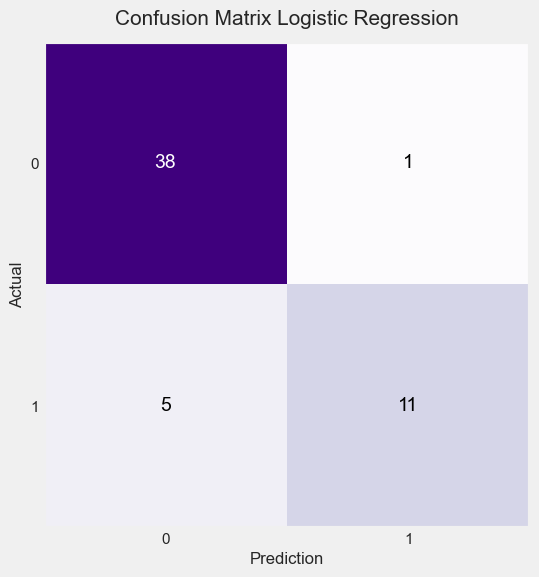

In [924]:
cmlg = confusion_matrix(y_test, y_pred_lg)
print(cmlg)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmlg, figsize=(6, 6), cmap=plt.cm.Purples)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Logistic Regression', fontsize=15, pad=12)
plt.show()

### Hyperparameter Tuning

In [925]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
logregrs = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=42, cv=5, n_iter=50)
logregrs.fit(X_train, y_train)
lgmodelbest = logregrs.best_estimator_
eval_classification(lgmodelbest)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.86
Precision (Test Set): 0.86
Precision (Train Set): 0.86
Recall (Test Set): 0.75
Recall (Train Set): 0.65
F1-Score (Test Set): 0.80
F1-Score (Train Set): 0.74
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.90
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9986068111455108


### **Fit Model : K-Nearest Neighbor**

---

In [926]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knnmodel = knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knnmodel)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.86
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.50
Recall (Train Set): 0.56
F1-Score (Test Set): 0.67
F1-Score (Train Set): 0.72
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.97
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9984520123839008


In [927]:
y_pred_knn_prob = knnmodel.predict_proba(X_test)[:,1]
y_pred_knn = knnmodel.predict(X_test)

[[39  0]
 [ 8  8]]



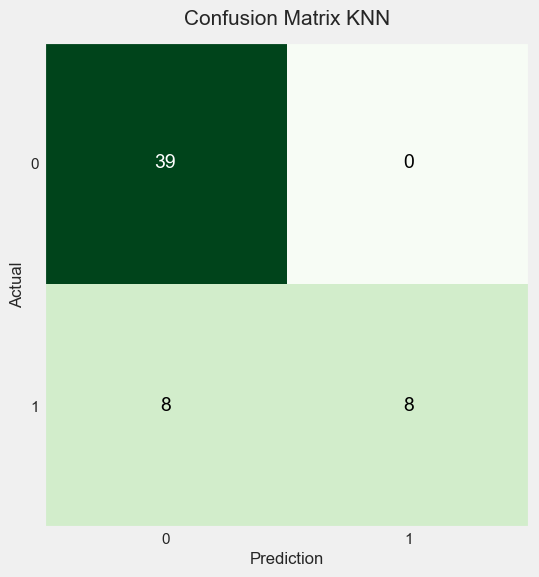

In [928]:
cmknn = confusion_matrix(y_test, y_pred_knn)
print(cmknn)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmknn, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix KNN', fontsize=15, pad=12)
plt.show()

### Hyperparameter Tuning

In [929]:
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knnmodel = knn.fit(X_train, y_train)
knnrs = RandomizedSearchCV(knnmodel, hyperparameters, scoring='recall', random_state=11, cv=5)
knnrs.fit(X_train, y_train)
knnmodelbest = knnrs.best_estimator_
eval_classification(knnmodelbest)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.85
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.56
Recall (Train Set): 0.53
F1-Score (Test Set): 0.72
F1-Score (Train Set): 0.69
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.98
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9987616099071207


### **Fit Model : Decision Tree**

---

In [930]:
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dtmodel = dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dtmodel)

Accuracy (Test Set): 1.00
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 1.00
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9995356037151704


In [931]:
y_pred_dt_prob = dtmodel.predict_proba(X_test)[:,1]
y_pred_dt = dtmodel.predict(X_test)

[[39  0]
 [ 0 16]]



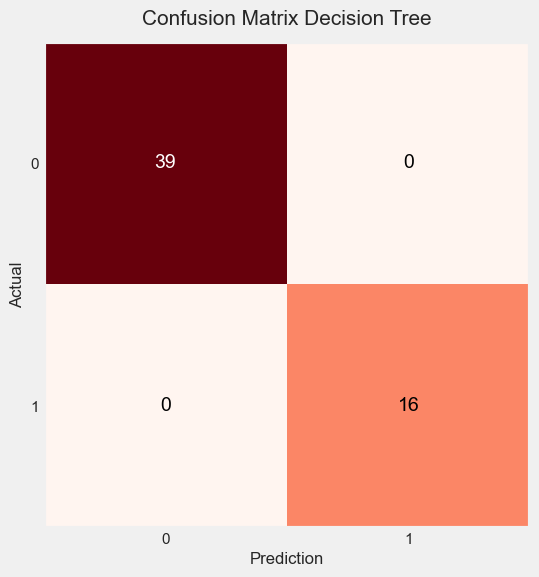

In [932]:
cmdt = confusion_matrix(y_test, y_pred_dt)
print(cmdt)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmdt, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Decision Tree', fontsize=15, pad=12)
plt.show()

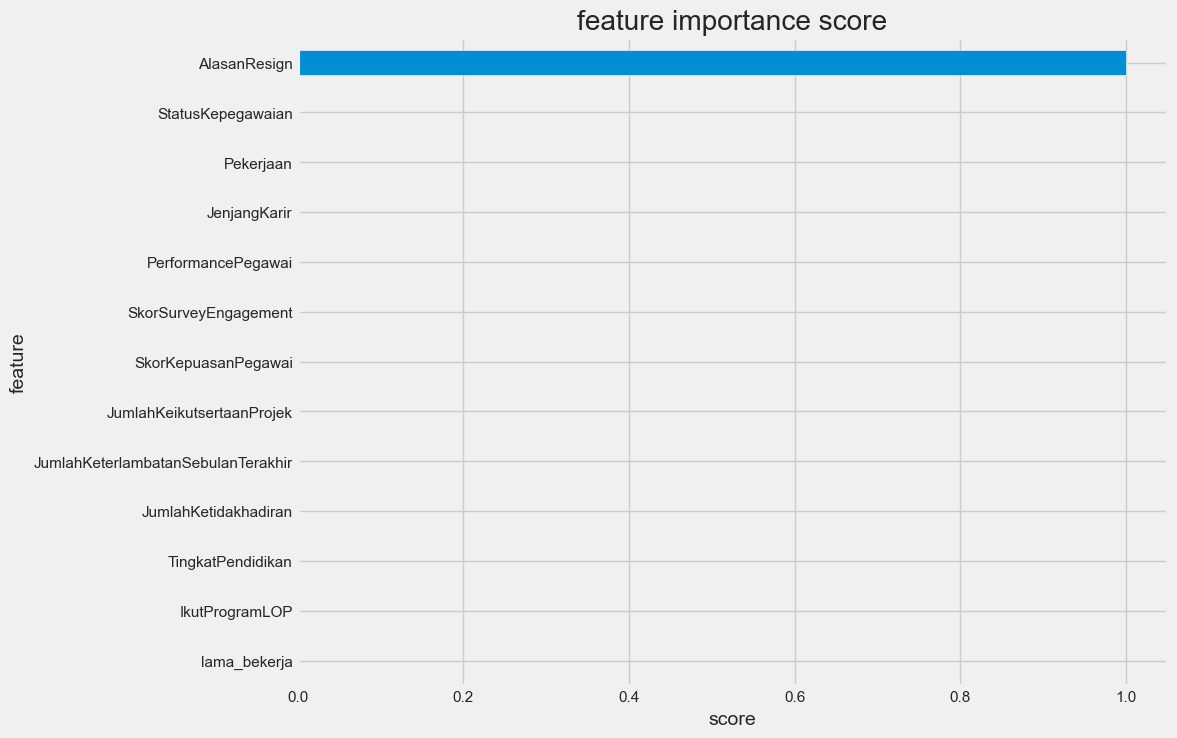

In [933]:
show_feature_importance(dtmodel)

### **Fit Model : Random Forest**

---

In [934]:
rf = RandomForestClassifier(random_state=42)
rfmodel = rf.fit(X_train, y_train)
eval_classification(rfmodel)

Accuracy (Test Set): 0.96
Accuracy (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9995356037151704


In [935]:
y_pred_rf_prob = rfmodel.predict_proba(X_test)[:,1]
y_pred_rf = rfmodel.predict(X_test)

[[38  1]
 [ 1 15]]



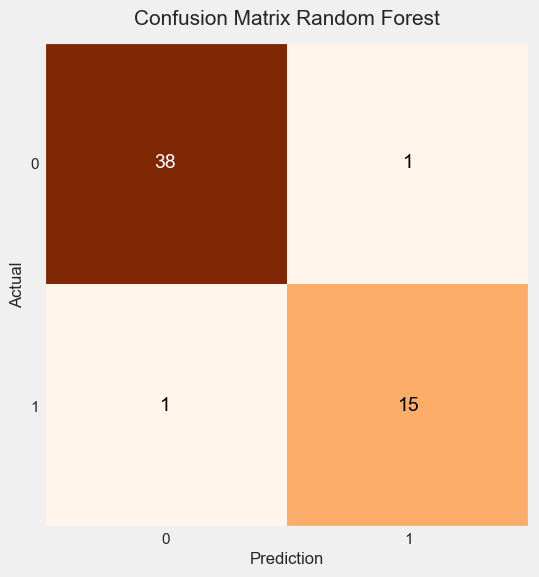

In [936]:
cmrf = confusion_matrix(y_test, y_pred_rf)
print(cmrf)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmrf, figsize=(6, 6), cmap=plt.cm.Oranges)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Random Forest', fontsize=15, pad=12)
plt.show()

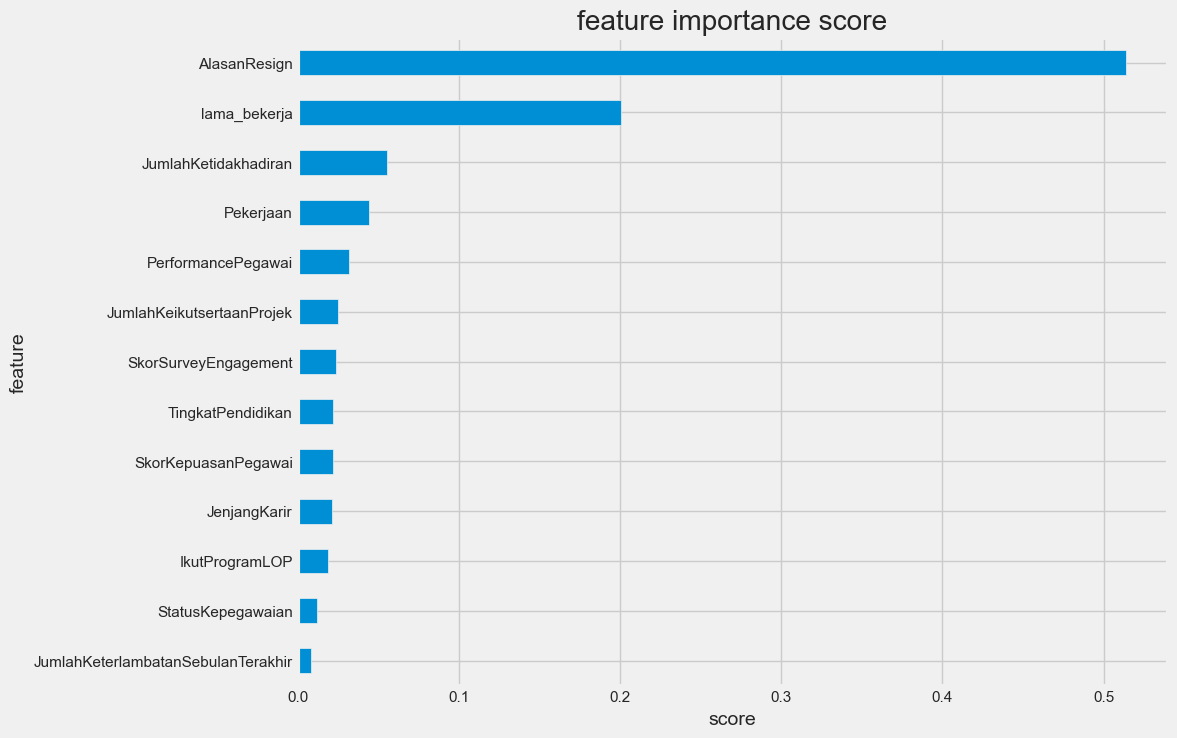

In [937]:
show_feature_importance(rfmodel)

### Hyperparameter Tuning

In [938]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=11)
rfrs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=42, cv=5)
rfrs.fit(X_train, y_train)
rsmodelbest = rfrs.best_estimator_
y_pred_rs2 = rsmodelbest.predict(X_test)
y_pred_rs2_prob= rsmodelbest.predict_proba(X_test)[:,1]
eval_classification(rsmodelbest)

Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9995356037151704


[[39  0]
 [ 1 15]]



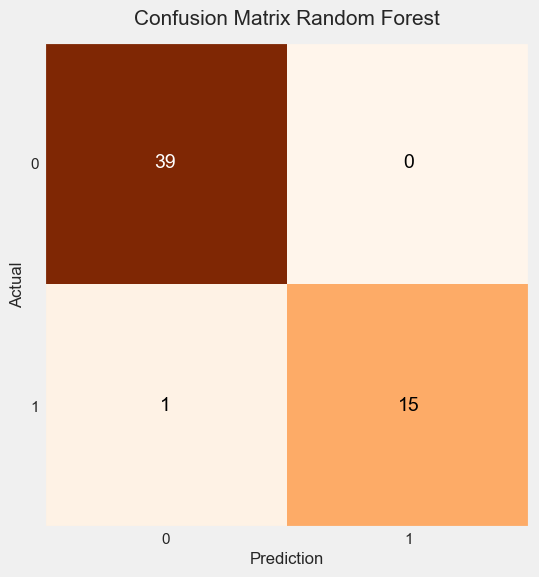

In [939]:
cmrf = confusion_matrix(y_test, y_pred_rs2)
print(cmrf)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmrf, figsize=(6, 6), cmap=plt.cm.Oranges)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Random Forest', fontsize=15, pad=12)
plt.show()

### **Fit Model : XGBoost**

---

In [940]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xgmodel = xg.fit(X_train, y_train)
eval_classification(xgmodel)

Accuracy (Test Set): 1.00
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 1.00
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9996904024767801


In [941]:
y_pred_xg_prob = xgmodel.predict_proba(X_test)[:,1]
y_pred_xg = xgmodel.predict(X_test)

[[39  0]
 [ 0 16]]



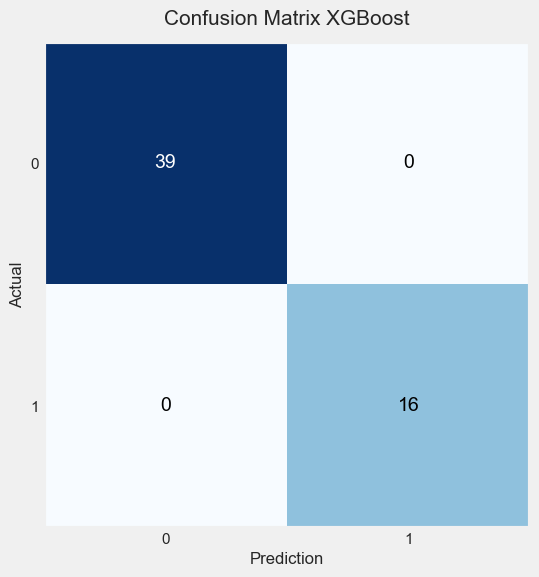

In [942]:
cmxg = confusion_matrix(y_test, y_pred_xg)
print(cmxg)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmxg, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix XGBoost', fontsize=15, pad=12)
plt.show()

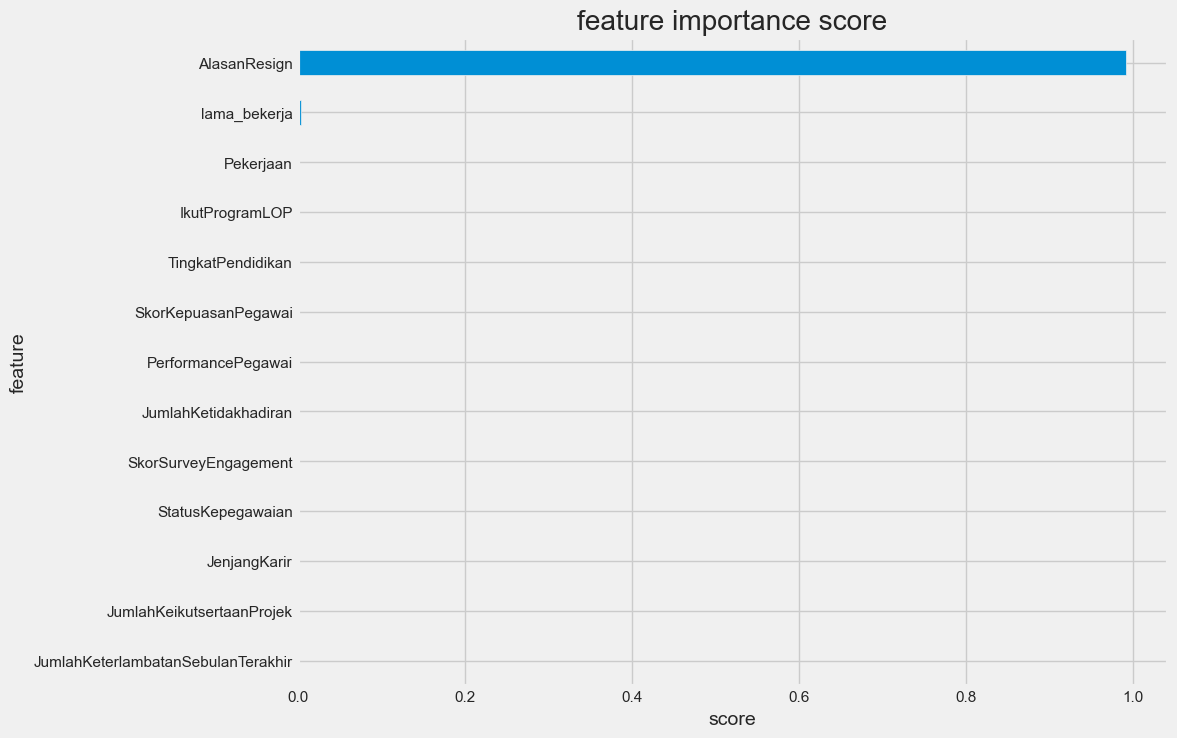

In [943]:
show_feature_importance(xgmodel)

# Conclusion

Model yang dipilih adalah model Decision Tree yang belum di tuning parameternya. Metrix utama yang digunakan adalah Precision dimana tidak memperbolehkan FP besar dan secondary matrixnya adalah Accuracy.

# The Best Fit Model

### **`Decision Tree Model`**

Model ini memiliki score precision yang tinggi yakni mencapai **1.00** dengan probabilitas machine learning sebesar **1.00** dan Accuracy mencapai **1.00** pada hasil test data. Model tidak overfit maupun underfit yang dapat disebut sebagai model ***best fit***.

[[39  0]
 [ 0 16]]



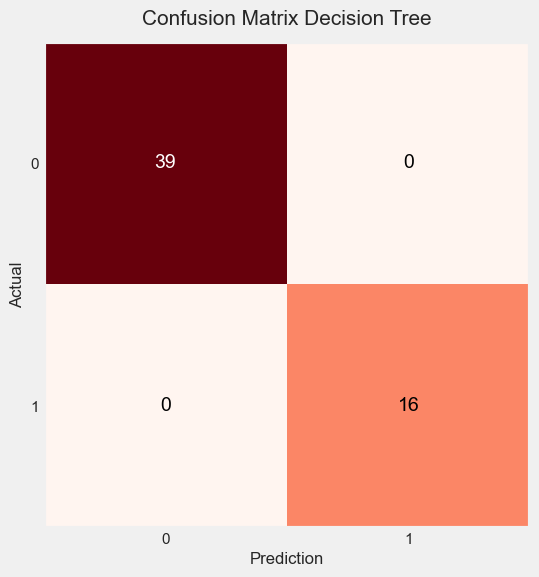

In [944]:
cmdt = confusion_matrix(y_test, y_pred_dt)
print(cmdt)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmdt, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Decision Tree', fontsize=15, pad=12)
plt.show()

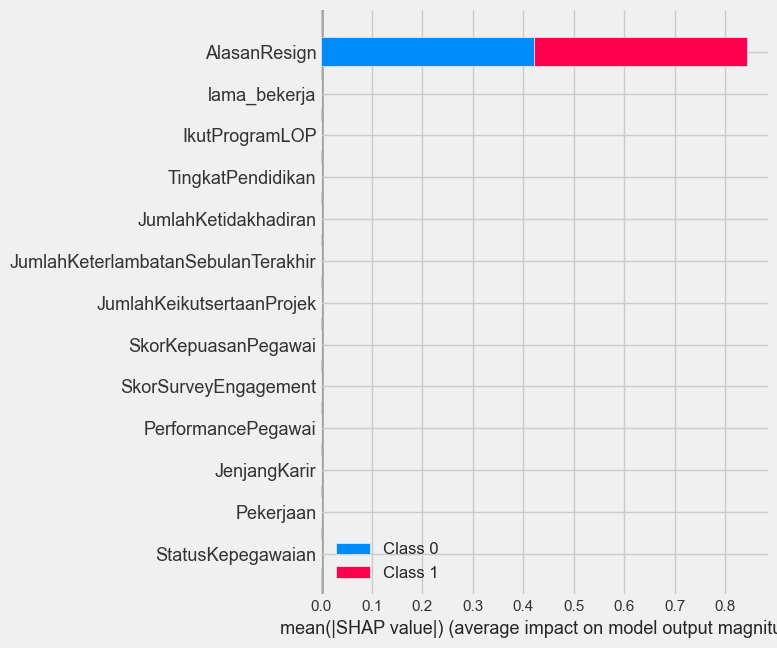

In [947]:
# Melihat shap value tiap features
import shap


explainer = shap.TreeExplainer(dtmodel)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

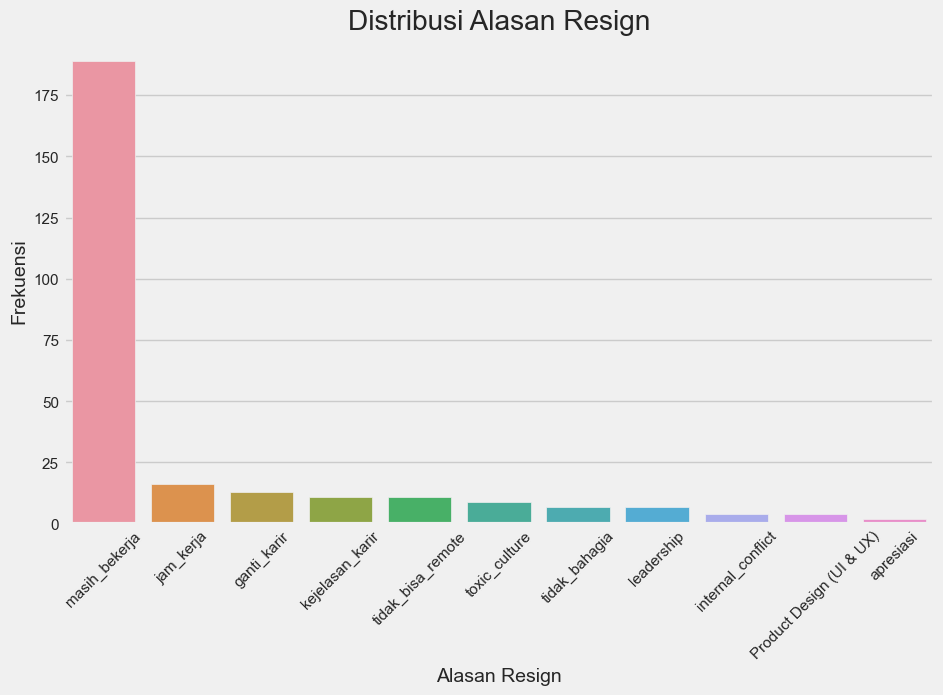

In [948]:
# Count the number of times each value in the column "Reason to Resign"
reason_counts = df_clean['AlasanResign'].value_counts()

# Creating bar plots using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values)
plt.xlabel('Alasan Resign')
plt.ylabel('Frekuensi')
plt.title('Distribusi Alasan Resign')
plt.xticks(rotation=45)  # Set the x label rotation if needed
plt.show()